 # Grokking on division mod 97

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import torch
from torch import Tensor
from torch.nn.functional import cross_entropy
from torch.optim import AdamW
from torch.optim.lr_scheduler import LambdaLR
from net import Grokformer
from data_factory import create_algorithmic, divide

### Helper function
Define a function to evaluate the model on some data.

In [2]:
def get_acc(model: Grokformer, data: Tensor, labels: Tensor):
    model.train(False)
    with torch.no_grad():
        scores = model(data)
        res = torch.argmax(scores, dim=1, keepdim=False)
    match = torch.where(res == labels, True, False)
    return torch.count_nonzero(match).cpu().item() / match.shape[0]

### Training
Training the network on mod 97 division on 30% of the data.

Parameters

In [4]:
steps = 20000
train_ratio = 0.3
table_size = 97
device = torch.device("cuda:0")

Creating the data.

In [5]:
data = create_algorithmic(table_size, divide(table_size), device)
# Filter instances where <y> = 0, we don't need those as they are invalid.
idx = torch.where(data[:, 2] == 0, False, True)
data = data[idx]

In [6]:
# These record accuracy values throughout training, wil be used when plotting.
accs_tr = []
accs_val = []

# Create random train and validation sets.
data_index = torch.randperm(data.shape[0], device=device)
split = int(data.shape[0] * train_ratio)
training_set = data[data_index[:split]]
validation_set = data[data_index[split:]]

# Creating the model.
net = Grokformer(num_embeddings=99, embedding_dim=128, device=device)
optimizer = AdamW(net.parameters(), lr=1e-3, weight_decay=1., betas=(0.9, 0.98))
scheduler = LambdaLR(optimizer, lambda e: min(e/10, 1.))

# Training and evaluating after each epoch.
c = 0
while True:
    data = training_set
    # Creating input data and labels.
    for start in range(0, data.shape[0], 512):
        net.train(True)
        d = data[start:start + 512]  # d: (batch_size, 5)
        x = d[:, :-1]  # x: (batch_size, 4)
        y = d[:, -1].flatten()  # y: (batch_size,)

        optimizer.zero_grad()

        scores = net(x)
        loss = cross_entropy(input=scores, target=y.to(torch.long))

        loss.backward()
        optimizer.step()
        if scheduler:
            scheduler.step()

        print(f"Optim step {c}")
        acc_train = get_acc(net, training_set[:, :-1], training_set[:, -1].flatten().to(torch.long))
        accs_tr.append(acc_train)
        print(f"Training accuracy:\t{acc_train*100:.3f}%")

        acc_val = get_acc(net, validation_set[:, :-1], validation_set[:, -1].flatten().to(torch.long))
        accs_val.append(acc_val)
        print(f"Validation accuracy:\t{acc_val * 100:.3f}%\n")
        c += 1
        if c >= steps:
            break
    if c >= steps:
        break

Optim step 0
Training accuracy:	0.000%
Validation accuracy:	0.000%

Optim step 1
Training accuracy:	0.000%
Validation accuracy:	0.000%

Optim step 2
Training accuracy:	0.000%
Validation accuracy:	0.000%

Optim step 3
Training accuracy:	0.000%
Validation accuracy:	0.000%

Optim step 4
Training accuracy:	0.752%
Validation accuracy:	0.706%

Optim step 5
Training accuracy:	1.289%
Validation accuracy:	1.043%

Optim step 6
Training accuracy:	0.823%
Validation accuracy:	1.089%

Optim step 7
Training accuracy:	1.038%
Validation accuracy:	0.890%

Optim step 8
Training accuracy:	1.217%
Validation accuracy:	0.721%

Optim step 9
Training accuracy:	1.003%
Validation accuracy:	0.767%

Optim step 10
Training accuracy:	0.967%
Validation accuracy:	1.043%

Optim step 11
Training accuracy:	1.038%
Validation accuracy:	0.966%

Optim step 12
Training accuracy:	0.931%
Validation accuracy:	1.181%

Optim step 13
Training accuracy:	0.967%
Validation accuracy:	0.997%

Optim step 14
Training accuracy:	1.003%
Vali

Optim step 120
Training accuracy:	1.826%
Validation accuracy:	0.690%

Optim step 121
Training accuracy:	1.611%
Validation accuracy:	0.721%

Optim step 122
Training accuracy:	1.540%
Validation accuracy:	0.752%

Optim step 123
Training accuracy:	2.005%
Validation accuracy:	0.706%

Optim step 124
Training accuracy:	2.112%
Validation accuracy:	0.675%

Optim step 125
Training accuracy:	1.969%
Validation accuracy:	0.614%

Optim step 126
Training accuracy:	1.862%
Validation accuracy:	0.706%

Optim step 127
Training accuracy:	1.790%
Validation accuracy:	0.782%

Optim step 128
Training accuracy:	1.647%
Validation accuracy:	0.752%

Optim step 129
Training accuracy:	1.969%
Validation accuracy:	0.675%

Optim step 130
Training accuracy:	2.363%
Validation accuracy:	0.798%

Optim step 131
Training accuracy:	2.291%
Validation accuracy:	0.752%

Optim step 132
Training accuracy:	2.148%
Validation accuracy:	0.690%

Optim step 133
Training accuracy:	1.933%
Validation accuracy:	0.798%

Optim step 134
Train

Validation accuracy:	1.166%

Optim step 241
Training accuracy:	8.808%
Validation accuracy:	1.135%

Optim step 242
Training accuracy:	8.378%
Validation accuracy:	1.181%

Optim step 243
Training accuracy:	8.808%
Validation accuracy:	1.166%

Optim step 244
Training accuracy:	9.309%
Validation accuracy:	1.197%

Optim step 245
Training accuracy:	9.202%
Validation accuracy:	1.197%

Optim step 246
Training accuracy:	9.023%
Validation accuracy:	1.166%

Optim step 247
Training accuracy:	8.915%
Validation accuracy:	1.104%

Optim step 248
Training accuracy:	9.058%
Validation accuracy:	1.212%

Optim step 249
Training accuracy:	9.703%
Validation accuracy:	1.166%

Optim step 250
Training accuracy:	9.918%
Validation accuracy:	1.212%

Optim step 251
Training accuracy:	10.025%
Validation accuracy:	1.166%

Optim step 252
Training accuracy:	9.846%
Validation accuracy:	1.120%

Optim step 253
Training accuracy:	10.025%
Validation accuracy:	1.120%

Optim step 254
Training accuracy:	9.703%
Validation accurac

Training accuracy:	30.791%
Validation accuracy:	1.089%

Optim step 357
Training accuracy:	32.295%
Validation accuracy:	1.058%

Optim step 358
Training accuracy:	31.651%
Validation accuracy:	1.074%

Optim step 359
Training accuracy:	31.615%
Validation accuracy:	1.074%

Optim step 360
Training accuracy:	32.116%
Validation accuracy:	1.074%

Optim step 361
Training accuracy:	32.617%
Validation accuracy:	1.074%

Optim step 362
Training accuracy:	31.901%
Validation accuracy:	1.104%

Optim step 363
Training accuracy:	34.300%
Validation accuracy:	1.089%

Optim step 364
Training accuracy:	34.443%
Validation accuracy:	1.074%

Optim step 365
Training accuracy:	33.119%
Validation accuracy:	1.058%

Optim step 366
Training accuracy:	33.190%
Validation accuracy:	1.074%

Optim step 367
Training accuracy:	33.512%
Validation accuracy:	1.074%

Optim step 368
Training accuracy:	33.584%
Validation accuracy:	1.089%

Optim step 369
Training accuracy:	33.441%
Validation accuracy:	1.104%

Optim step 370
Traini

Validation accuracy:	1.089%

Optim step 475
Training accuracy:	68.457%
Validation accuracy:	1.089%

Optim step 476
Training accuracy:	72.897%
Validation accuracy:	1.074%

Optim step 477
Training accuracy:	71.930%
Validation accuracy:	1.043%

Optim step 478
Training accuracy:	69.388%
Validation accuracy:	1.058%

Optim step 479
Training accuracy:	66.273%
Validation accuracy:	1.074%

Optim step 480
Training accuracy:	71.464%
Validation accuracy:	1.089%

Optim step 481
Training accuracy:	73.362%
Validation accuracy:	1.104%

Optim step 482
Training accuracy:	68.242%
Validation accuracy:	1.074%

Optim step 483
Training accuracy:	69.280%
Validation accuracy:	1.058%

Optim step 484
Training accuracy:	74.293%
Validation accuracy:	1.043%

Optim step 485
Training accuracy:	65.951%
Validation accuracy:	1.058%

Optim step 486
Training accuracy:	70.140%
Validation accuracy:	1.104%

Optim step 487
Training accuracy:	72.538%
Validation accuracy:	1.074%

Optim step 488
Training accuracy:	73.756%
Valida

Validation accuracy:	1.089%

Optim step 592
Training accuracy:	86.359%
Validation accuracy:	1.074%

Optim step 593
Training accuracy:	80.057%
Validation accuracy:	1.120%

Optim step 594
Training accuracy:	86.932%
Validation accuracy:	1.074%

Optim step 595
Training accuracy:	93.126%
Validation accuracy:	1.074%

Optim step 596
Training accuracy:	89.832%
Validation accuracy:	1.104%

Optim step 597
Training accuracy:	86.072%
Validation accuracy:	1.089%

Optim step 598
Training accuracy:	90.405%
Validation accuracy:	1.104%

Optim step 599
Training accuracy:	88.543%
Validation accuracy:	1.104%

Optim step 600
Training accuracy:	88.722%
Validation accuracy:	1.104%

Optim step 601
Training accuracy:	91.479%
Validation accuracy:	1.074%

Optim step 602
Training accuracy:	94.594%
Validation accuracy:	1.104%

Optim step 603
Training accuracy:	91.407%
Validation accuracy:	1.089%

Optim step 604
Training accuracy:	90.906%
Validation accuracy:	1.120%

Optim step 605
Training accuracy:	88.865%
Valida

Validation accuracy:	1.058%

Optim step 709
Training accuracy:	96.957%
Validation accuracy:	1.104%

Optim step 710
Training accuracy:	93.878%
Validation accuracy:	1.089%

Optim step 711
Training accuracy:	94.987%
Validation accuracy:	1.104%

Optim step 712
Training accuracy:	97.530%
Validation accuracy:	1.089%

Optim step 713
Training accuracy:	92.016%
Validation accuracy:	1.074%

Optim step 714
Training accuracy:	91.013%
Validation accuracy:	1.089%

Optim step 715
Training accuracy:	97.422%
Validation accuracy:	1.058%

Optim step 716
Training accuracy:	96.026%
Validation accuracy:	1.074%

Optim step 717
Training accuracy:	92.266%
Validation accuracy:	1.089%

Optim step 718
Training accuracy:	95.059%
Validation accuracy:	1.074%

Optim step 719
Training accuracy:	95.274%
Validation accuracy:	1.074%

Optim step 720
Training accuracy:	96.527%
Validation accuracy:	1.074%

Optim step 721
Training accuracy:	95.238%
Validation accuracy:	1.089%

Optim step 722
Training accuracy:	94.629%
Valida

Validation accuracy:	1.104%

Optim step 826
Training accuracy:	100.000%
Validation accuracy:	1.120%

Optim step 827
Training accuracy:	99.857%
Validation accuracy:	1.120%

Optim step 828
Training accuracy:	100.000%
Validation accuracy:	1.120%

Optim step 829
Training accuracy:	100.000%
Validation accuracy:	1.104%

Optim step 830
Training accuracy:	99.857%
Validation accuracy:	1.104%

Optim step 831
Training accuracy:	99.964%
Validation accuracy:	1.089%

Optim step 832
Training accuracy:	100.000%
Validation accuracy:	1.104%

Optim step 833
Training accuracy:	99.714%
Validation accuracy:	1.089%

Optim step 834
Training accuracy:	99.749%
Validation accuracy:	1.104%

Optim step 835
Training accuracy:	100.000%
Validation accuracy:	1.135%

Optim step 836
Training accuracy:	99.570%
Validation accuracy:	1.089%

Optim step 837
Training accuracy:	99.678%
Validation accuracy:	1.058%

Optim step 838
Training accuracy:	99.964%
Validation accuracy:	1.089%

Optim step 839
Training accuracy:	99.356%
V

Validation accuracy:	1.104%

Optim step 943
Training accuracy:	100.000%
Validation accuracy:	1.089%

Optim step 944
Training accuracy:	100.000%
Validation accuracy:	1.089%

Optim step 945
Training accuracy:	100.000%
Validation accuracy:	1.120%

Optim step 946
Training accuracy:	100.000%
Validation accuracy:	1.120%

Optim step 947
Training accuracy:	100.000%
Validation accuracy:	1.120%

Optim step 948
Training accuracy:	100.000%
Validation accuracy:	1.089%

Optim step 949
Training accuracy:	100.000%
Validation accuracy:	1.089%

Optim step 950
Training accuracy:	100.000%
Validation accuracy:	1.089%

Optim step 951
Training accuracy:	100.000%
Validation accuracy:	1.089%

Optim step 952
Training accuracy:	100.000%
Validation accuracy:	1.104%

Optim step 953
Training accuracy:	100.000%
Validation accuracy:	1.104%

Optim step 954
Training accuracy:	100.000%
Validation accuracy:	1.104%

Optim step 955
Training accuracy:	100.000%
Validation accuracy:	1.104%

Optim step 956
Training accuracy:	1

Validation accuracy:	1.120%

Optim step 1057
Training accuracy:	97.136%
Validation accuracy:	1.181%

Optim step 1058
Training accuracy:	90.297%
Validation accuracy:	1.150%

Optim step 1059
Training accuracy:	92.302%
Validation accuracy:	1.197%

Optim step 1060
Training accuracy:	82.206%
Validation accuracy:	1.120%

Optim step 1061
Training accuracy:	86.144%
Validation accuracy:	1.150%

Optim step 1062
Training accuracy:	92.839%
Validation accuracy:	1.043%

Optim step 1063
Training accuracy:	92.266%
Validation accuracy:	1.089%

Optim step 1064
Training accuracy:	89.903%
Validation accuracy:	1.135%

Optim step 1065
Training accuracy:	91.085%
Validation accuracy:	1.166%

Optim step 1066
Training accuracy:	95.131%
Validation accuracy:	1.150%

Optim step 1067
Training accuracy:	89.832%
Validation accuracy:	1.135%

Optim step 1068
Training accuracy:	95.346%
Validation accuracy:	1.089%

Optim step 1069
Training accuracy:	92.302%
Validation accuracy:	1.120%

Optim step 1070
Training accuracy:	


Optim step 1171
Training accuracy:	100.000%
Validation accuracy:	1.104%

Optim step 1172
Training accuracy:	100.000%
Validation accuracy:	1.104%

Optim step 1173
Training accuracy:	100.000%
Validation accuracy:	1.120%

Optim step 1174
Training accuracy:	100.000%
Validation accuracy:	1.104%

Optim step 1175
Training accuracy:	100.000%
Validation accuracy:	1.104%

Optim step 1176
Training accuracy:	100.000%
Validation accuracy:	1.120%

Optim step 1177
Training accuracy:	100.000%
Validation accuracy:	1.120%

Optim step 1178
Training accuracy:	100.000%
Validation accuracy:	1.120%

Optim step 1179
Training accuracy:	100.000%
Validation accuracy:	1.135%

Optim step 1180
Training accuracy:	100.000%
Validation accuracy:	1.120%

Optim step 1181
Training accuracy:	100.000%
Validation accuracy:	1.120%

Optim step 1182
Training accuracy:	100.000%
Validation accuracy:	1.135%

Optim step 1183
Training accuracy:	100.000%
Validation accuracy:	1.120%

Optim step 1184
Training accuracy:	100.000%
Valida

Optim step 1285
Training accuracy:	85.643%
Validation accuracy:	1.089%

Optim step 1286
Training accuracy:	89.295%
Validation accuracy:	1.089%

Optim step 1287
Training accuracy:	88.865%
Validation accuracy:	1.058%

Optim step 1288
Training accuracy:	89.151%
Validation accuracy:	1.074%

Optim step 1289
Training accuracy:	88.722%
Validation accuracy:	1.120%

Optim step 1290
Training accuracy:	92.589%
Validation accuracy:	1.166%

Optim step 1291
Training accuracy:	95.560%
Validation accuracy:	1.135%

Optim step 1292
Training accuracy:	97.386%
Validation accuracy:	1.135%

Optim step 1293
Training accuracy:	97.207%
Validation accuracy:	1.120%

Optim step 1294
Training accuracy:	97.888%
Validation accuracy:	1.104%

Optim step 1295
Training accuracy:	96.778%
Validation accuracy:	1.120%

Optim step 1296
Training accuracy:	97.386%
Validation accuracy:	1.135%

Optim step 1297
Training accuracy:	98.317%
Validation accuracy:	1.135%

Optim step 1298
Training accuracy:	98.854%
Validation accuracy:	

Validation accuracy:	1.104%

Optim step 1398
Training accuracy:	100.000%
Validation accuracy:	1.104%

Optim step 1399
Training accuracy:	100.000%
Validation accuracy:	1.104%

Optim step 1400
Training accuracy:	100.000%
Validation accuracy:	1.104%

Optim step 1401
Training accuracy:	100.000%
Validation accuracy:	1.089%

Optim step 1402
Training accuracy:	100.000%
Validation accuracy:	1.104%

Optim step 1403
Training accuracy:	100.000%
Validation accuracy:	1.104%

Optim step 1404
Training accuracy:	100.000%
Validation accuracy:	1.120%

Optim step 1405
Training accuracy:	100.000%
Validation accuracy:	1.104%

Optim step 1406
Training accuracy:	100.000%
Validation accuracy:	1.104%

Optim step 1407
Training accuracy:	100.000%
Validation accuracy:	1.104%

Optim step 1408
Training accuracy:	100.000%
Validation accuracy:	1.089%

Optim step 1409
Training accuracy:	100.000%
Validation accuracy:	1.120%

Optim step 1410
Training accuracy:	100.000%
Validation accuracy:	1.120%

Optim step 1411
Traini

Optim step 1512
Training accuracy:	99.928%
Validation accuracy:	1.166%

Optim step 1513
Training accuracy:	99.964%
Validation accuracy:	1.135%

Optim step 1514
Training accuracy:	100.000%
Validation accuracy:	1.120%

Optim step 1515
Training accuracy:	100.000%
Validation accuracy:	1.120%

Optim step 1516
Training accuracy:	99.964%
Validation accuracy:	1.150%

Optim step 1517
Training accuracy:	99.893%
Validation accuracy:	1.135%

Optim step 1518
Training accuracy:	99.964%
Validation accuracy:	1.120%

Optim step 1519
Training accuracy:	100.000%
Validation accuracy:	1.150%

Optim step 1520
Training accuracy:	100.000%
Validation accuracy:	1.135%

Optim step 1521
Training accuracy:	100.000%
Validation accuracy:	1.166%

Optim step 1522
Training accuracy:	100.000%
Validation accuracy:	1.135%

Optim step 1523
Training accuracy:	100.000%
Validation accuracy:	1.135%

Optim step 1524
Training accuracy:	100.000%
Validation accuracy:	1.135%

Optim step 1525
Training accuracy:	99.964%
Validation ac

Validation accuracy:	1.135%

Optim step 1626
Training accuracy:	100.000%
Validation accuracy:	1.135%

Optim step 1627
Training accuracy:	100.000%
Validation accuracy:	1.150%

Optim step 1628
Training accuracy:	100.000%
Validation accuracy:	1.135%

Optim step 1629
Training accuracy:	100.000%
Validation accuracy:	1.135%

Optim step 1630
Training accuracy:	100.000%
Validation accuracy:	1.120%

Optim step 1631
Training accuracy:	100.000%
Validation accuracy:	1.120%

Optim step 1632
Training accuracy:	100.000%
Validation accuracy:	1.135%

Optim step 1633
Training accuracy:	100.000%
Validation accuracy:	1.150%

Optim step 1634
Training accuracy:	100.000%
Validation accuracy:	1.120%

Optim step 1635
Training accuracy:	100.000%
Validation accuracy:	1.135%

Optim step 1636
Training accuracy:	100.000%
Validation accuracy:	1.120%

Optim step 1637
Training accuracy:	100.000%
Validation accuracy:	1.150%

Optim step 1638
Training accuracy:	100.000%
Validation accuracy:	1.135%

Optim step 1639
Traini

Validation accuracy:	1.089%

Optim step 1740
Training accuracy:	100.000%
Validation accuracy:	1.135%

Optim step 1741
Training accuracy:	100.000%
Validation accuracy:	1.150%

Optim step 1742
Training accuracy:	100.000%
Validation accuracy:	1.150%

Optim step 1743
Training accuracy:	100.000%
Validation accuracy:	1.150%

Optim step 1744
Training accuracy:	100.000%
Validation accuracy:	1.135%

Optim step 1745
Training accuracy:	100.000%
Validation accuracy:	1.120%

Optim step 1746
Training accuracy:	100.000%
Validation accuracy:	1.135%

Optim step 1747
Training accuracy:	100.000%
Validation accuracy:	1.104%

Optim step 1748
Training accuracy:	100.000%
Validation accuracy:	1.135%

Optim step 1749
Training accuracy:	100.000%
Validation accuracy:	1.135%

Optim step 1750
Training accuracy:	100.000%
Validation accuracy:	1.120%

Optim step 1751
Training accuracy:	100.000%
Validation accuracy:	1.150%

Optim step 1752
Training accuracy:	100.000%
Validation accuracy:	1.150%

Optim step 1753
Traini

Validation accuracy:	1.457%

Optim step 1854
Training accuracy:	70.068%
Validation accuracy:	1.243%

Optim step 1855
Training accuracy:	74.329%
Validation accuracy:	1.212%

Optim step 1856
Training accuracy:	79.592%
Validation accuracy:	1.197%

Optim step 1857
Training accuracy:	81.776%
Validation accuracy:	1.289%

Optim step 1858
Training accuracy:	86.502%
Validation accuracy:	1.273%

Optim step 1859
Training accuracy:	67.383%
Validation accuracy:	1.427%

Optim step 1860
Training accuracy:	84.998%
Validation accuracy:	1.289%

Optim step 1861
Training accuracy:	90.512%
Validation accuracy:	1.166%

Optim step 1862
Training accuracy:	92.231%
Validation accuracy:	1.258%

Optim step 1863
Training accuracy:	94.021%
Validation accuracy:	1.212%

Optim step 1864
Training accuracy:	93.197%
Validation accuracy:	1.243%

Optim step 1865
Training accuracy:	89.295%
Validation accuracy:	1.258%

Optim step 1866
Training accuracy:	95.310%
Validation accuracy:	1.181%

Optim step 1867
Training accuracy:	

Validation accuracy:	1.150%

Optim step 1968
Training accuracy:	100.000%
Validation accuracy:	1.166%

Optim step 1969
Training accuracy:	100.000%
Validation accuracy:	1.197%

Optim step 1970
Training accuracy:	100.000%
Validation accuracy:	1.166%

Optim step 1971
Training accuracy:	100.000%
Validation accuracy:	1.166%

Optim step 1972
Training accuracy:	100.000%
Validation accuracy:	1.197%

Optim step 1973
Training accuracy:	100.000%
Validation accuracy:	1.150%

Optim step 1974
Training accuracy:	100.000%
Validation accuracy:	1.166%

Optim step 1975
Training accuracy:	100.000%
Validation accuracy:	1.227%

Optim step 1976
Training accuracy:	100.000%
Validation accuracy:	1.166%

Optim step 1977
Training accuracy:	100.000%
Validation accuracy:	1.181%

Optim step 1978
Training accuracy:	100.000%
Validation accuracy:	1.166%

Optim step 1979
Training accuracy:	100.000%
Validation accuracy:	1.197%

Optim step 1980
Training accuracy:	100.000%
Validation accuracy:	1.181%

Optim step 1981
Traini

Optim step 2082
Training accuracy:	100.000%
Validation accuracy:	1.150%

Optim step 2083
Training accuracy:	100.000%
Validation accuracy:	1.150%

Optim step 2084
Training accuracy:	100.000%
Validation accuracy:	1.166%

Optim step 2085
Training accuracy:	100.000%
Validation accuracy:	1.150%

Optim step 2086
Training accuracy:	100.000%
Validation accuracy:	1.150%

Optim step 2087
Training accuracy:	100.000%
Validation accuracy:	1.150%

Optim step 2088
Training accuracy:	100.000%
Validation accuracy:	1.166%

Optim step 2089
Training accuracy:	100.000%
Validation accuracy:	1.166%

Optim step 2090
Training accuracy:	100.000%
Validation accuracy:	1.181%

Optim step 2091
Training accuracy:	100.000%
Validation accuracy:	1.181%

Optim step 2092
Training accuracy:	100.000%
Validation accuracy:	1.166%

Optim step 2093
Training accuracy:	100.000%
Validation accuracy:	1.150%

Optim step 2094
Training accuracy:	100.000%
Validation accuracy:	1.150%

Optim step 2095
Training accuracy:	100.000%
Validat

Validation accuracy:	1.181%

Optim step 2196
Training accuracy:	100.000%
Validation accuracy:	1.166%

Optim step 2197
Training accuracy:	100.000%
Validation accuracy:	1.197%

Optim step 2198
Training accuracy:	100.000%
Validation accuracy:	1.197%

Optim step 2199
Training accuracy:	100.000%
Validation accuracy:	1.181%

Optim step 2200
Training accuracy:	100.000%
Validation accuracy:	1.273%

Optim step 2201
Training accuracy:	100.000%
Validation accuracy:	1.243%

Optim step 2202
Training accuracy:	100.000%
Validation accuracy:	1.212%

Optim step 2203
Training accuracy:	100.000%
Validation accuracy:	1.243%

Optim step 2204
Training accuracy:	100.000%
Validation accuracy:	1.212%

Optim step 2205
Training accuracy:	100.000%
Validation accuracy:	1.243%

Optim step 2206
Training accuracy:	100.000%
Validation accuracy:	1.258%

Optim step 2207
Training accuracy:	100.000%
Validation accuracy:	1.243%

Optim step 2208
Training accuracy:	100.000%
Validation accuracy:	1.258%

Optim step 2209
Traini

Validation accuracy:	1.273%

Optim step 2311
Training accuracy:	100.000%
Validation accuracy:	1.258%

Optim step 2312
Training accuracy:	100.000%
Validation accuracy:	1.258%

Optim step 2313
Training accuracy:	100.000%
Validation accuracy:	1.258%

Optim step 2314
Training accuracy:	100.000%
Validation accuracy:	1.227%

Optim step 2315
Training accuracy:	100.000%
Validation accuracy:	1.227%

Optim step 2316
Training accuracy:	100.000%
Validation accuracy:	1.227%

Optim step 2317
Training accuracy:	100.000%
Validation accuracy:	1.258%

Optim step 2318
Training accuracy:	100.000%
Validation accuracy:	1.289%

Optim step 2319
Training accuracy:	100.000%
Validation accuracy:	1.258%

Optim step 2320
Training accuracy:	100.000%
Validation accuracy:	1.227%

Optim step 2321
Training accuracy:	100.000%
Validation accuracy:	1.227%

Optim step 2322
Training accuracy:	100.000%
Validation accuracy:	1.258%

Optim step 2323
Training accuracy:	100.000%
Validation accuracy:	1.243%

Optim step 2324
Traini

Training accuracy:	100.000%
Validation accuracy:	1.304%

Optim step 2424
Training accuracy:	100.000%
Validation accuracy:	1.289%

Optim step 2425
Training accuracy:	100.000%
Validation accuracy:	1.258%

Optim step 2426
Training accuracy:	100.000%
Validation accuracy:	1.243%

Optim step 2427
Training accuracy:	100.000%
Validation accuracy:	1.273%

Optim step 2428
Training accuracy:	100.000%
Validation accuracy:	1.273%

Optim step 2429
Training accuracy:	100.000%
Validation accuracy:	1.289%

Optim step 2430
Training accuracy:	100.000%
Validation accuracy:	1.319%

Optim step 2431
Training accuracy:	100.000%
Validation accuracy:	1.273%

Optim step 2432
Training accuracy:	100.000%
Validation accuracy:	1.243%

Optim step 2433
Training accuracy:	100.000%
Validation accuracy:	1.258%

Optim step 2434
Training accuracy:	100.000%
Validation accuracy:	1.304%

Optim step 2435
Training accuracy:	100.000%
Validation accuracy:	1.304%

Optim step 2436
Training accuracy:	100.000%
Validation accuracy:	1.

Optim step 2537
Training accuracy:	100.000%
Validation accuracy:	1.258%

Optim step 2538
Training accuracy:	100.000%
Validation accuracy:	1.335%

Optim step 2539
Training accuracy:	100.000%
Validation accuracy:	1.289%

Optim step 2540
Training accuracy:	100.000%
Validation accuracy:	1.243%

Optim step 2541
Training accuracy:	100.000%
Validation accuracy:	1.304%

Optim step 2542
Training accuracy:	100.000%
Validation accuracy:	1.289%

Optim step 2543
Training accuracy:	100.000%
Validation accuracy:	1.289%

Optim step 2544
Training accuracy:	100.000%
Validation accuracy:	1.381%

Optim step 2545
Training accuracy:	100.000%
Validation accuracy:	1.319%

Optim step 2546
Training accuracy:	100.000%
Validation accuracy:	1.335%

Optim step 2547
Training accuracy:	100.000%
Validation accuracy:	1.289%

Optim step 2548
Training accuracy:	92.410%
Validation accuracy:	1.749%

Optim step 2549
Training accuracy:	49.517%
Validation accuracy:	1.902%

Optim step 2550
Training accuracy:	69.209%
Validation

Optim step 2650
Training accuracy:	100.000%
Validation accuracy:	1.304%

Optim step 2651
Training accuracy:	100.000%
Validation accuracy:	1.350%

Optim step 2652
Training accuracy:	100.000%
Validation accuracy:	1.319%

Optim step 2653
Training accuracy:	100.000%
Validation accuracy:	1.258%

Optim step 2654
Training accuracy:	100.000%
Validation accuracy:	1.258%

Optim step 2655
Training accuracy:	100.000%
Validation accuracy:	1.243%

Optim step 2656
Training accuracy:	100.000%
Validation accuracy:	1.289%

Optim step 2657
Training accuracy:	100.000%
Validation accuracy:	1.304%

Optim step 2658
Training accuracy:	100.000%
Validation accuracy:	1.304%

Optim step 2659
Training accuracy:	100.000%
Validation accuracy:	1.273%

Optim step 2660
Training accuracy:	100.000%
Validation accuracy:	1.273%

Optim step 2661
Training accuracy:	100.000%
Validation accuracy:	1.258%

Optim step 2662
Training accuracy:	100.000%
Validation accuracy:	1.273%

Optim step 2663
Training accuracy:	100.000%
Validat

Validation accuracy:	1.243%

Optim step 2765
Training accuracy:	100.000%
Validation accuracy:	1.243%

Optim step 2766
Training accuracy:	100.000%
Validation accuracy:	1.243%

Optim step 2767
Training accuracy:	100.000%
Validation accuracy:	1.243%

Optim step 2768
Training accuracy:	100.000%
Validation accuracy:	1.227%

Optim step 2769
Training accuracy:	100.000%
Validation accuracy:	1.258%

Optim step 2770
Training accuracy:	100.000%
Validation accuracy:	1.258%

Optim step 2771
Training accuracy:	100.000%
Validation accuracy:	1.243%

Optim step 2772
Training accuracy:	100.000%
Validation accuracy:	1.243%

Optim step 2773
Training accuracy:	100.000%
Validation accuracy:	1.227%

Optim step 2774
Training accuracy:	100.000%
Validation accuracy:	1.258%

Optim step 2775
Training accuracy:	100.000%
Validation accuracy:	1.243%

Optim step 2776
Training accuracy:	100.000%
Validation accuracy:	1.243%

Optim step 2777
Training accuracy:	100.000%
Validation accuracy:	1.243%

Optim step 2778
Traini

Validation accuracy:	1.488%

Optim step 2880
Training accuracy:	96.169%
Validation accuracy:	1.411%

Optim step 2881
Training accuracy:	98.604%
Validation accuracy:	1.304%

Optim step 2882
Training accuracy:	99.427%
Validation accuracy:	1.304%

Optim step 2883
Training accuracy:	99.033%
Validation accuracy:	1.427%

Optim step 2884
Training accuracy:	98.962%
Validation accuracy:	1.289%

Optim step 2885
Training accuracy:	99.069%
Validation accuracy:	1.335%

Optim step 2886
Training accuracy:	99.463%
Validation accuracy:	1.396%

Optim step 2887
Training accuracy:	99.714%
Validation accuracy:	1.335%

Optim step 2888
Training accuracy:	99.964%
Validation accuracy:	1.350%

Optim step 2889
Training accuracy:	99.893%
Validation accuracy:	1.442%

Optim step 2890
Training accuracy:	99.893%
Validation accuracy:	1.335%

Optim step 2891
Training accuracy:	99.893%
Validation accuracy:	1.273%

Optim step 2892
Training accuracy:	99.964%
Validation accuracy:	1.335%

Optim step 2893
Training accuracy:	

Training accuracy:	100.000%
Validation accuracy:	1.335%

Optim step 2995
Training accuracy:	100.000%
Validation accuracy:	1.442%

Optim step 2996
Training accuracy:	100.000%
Validation accuracy:	1.365%

Optim step 2997
Training accuracy:	100.000%
Validation accuracy:	1.350%

Optim step 2998
Training accuracy:	100.000%
Validation accuracy:	1.350%

Optim step 2999
Training accuracy:	100.000%
Validation accuracy:	1.350%

Optim step 3000
Training accuracy:	100.000%
Validation accuracy:	1.350%

Optim step 3001
Training accuracy:	100.000%
Validation accuracy:	1.411%

Optim step 3002
Training accuracy:	100.000%
Validation accuracy:	1.396%

Optim step 3003
Training accuracy:	100.000%
Validation accuracy:	1.365%

Optim step 3004
Training accuracy:	100.000%
Validation accuracy:	1.350%

Optim step 3005
Training accuracy:	100.000%
Validation accuracy:	1.365%

Optim step 3006
Training accuracy:	100.000%
Validation accuracy:	1.335%

Optim step 3007
Training accuracy:	100.000%
Validation accuracy:	1.

Optim step 3109
Training accuracy:	100.000%
Validation accuracy:	1.442%

Optim step 3110
Training accuracy:	100.000%
Validation accuracy:	1.396%

Optim step 3111
Training accuracy:	100.000%
Validation accuracy:	1.411%

Optim step 3112
Training accuracy:	100.000%
Validation accuracy:	1.396%

Optim step 3113
Training accuracy:	100.000%
Validation accuracy:	1.381%

Optim step 3114
Training accuracy:	100.000%
Validation accuracy:	1.381%

Optim step 3115
Training accuracy:	100.000%
Validation accuracy:	1.396%

Optim step 3116
Training accuracy:	100.000%
Validation accuracy:	1.381%

Optim step 3117
Training accuracy:	100.000%
Validation accuracy:	1.381%

Optim step 3118
Training accuracy:	100.000%
Validation accuracy:	1.442%

Optim step 3119
Training accuracy:	100.000%
Validation accuracy:	1.442%

Optim step 3120
Training accuracy:	100.000%
Validation accuracy:	1.396%

Optim step 3121
Training accuracy:	100.000%
Validation accuracy:	1.381%

Optim step 3122
Training accuracy:	100.000%
Validat

Validation accuracy:	1.411%

Optim step 3222
Training accuracy:	100.000%
Validation accuracy:	1.319%

Optim step 3223
Training accuracy:	100.000%
Validation accuracy:	1.350%

Optim step 3224
Training accuracy:	100.000%
Validation accuracy:	1.427%

Optim step 3225
Training accuracy:	100.000%
Validation accuracy:	1.427%

Optim step 3226
Training accuracy:	100.000%
Validation accuracy:	1.457%

Optim step 3227
Training accuracy:	100.000%
Validation accuracy:	1.381%

Optim step 3228
Training accuracy:	100.000%
Validation accuracy:	1.442%

Optim step 3229
Training accuracy:	100.000%
Validation accuracy:	1.411%

Optim step 3230
Training accuracy:	100.000%
Validation accuracy:	1.457%

Optim step 3231
Training accuracy:	100.000%
Validation accuracy:	1.488%

Optim step 3232
Training accuracy:	100.000%
Validation accuracy:	1.457%

Optim step 3233
Training accuracy:	100.000%
Validation accuracy:	1.411%

Optim step 3234
Training accuracy:	100.000%
Validation accuracy:	1.350%

Optim step 3235
Traini

Training accuracy:	100.000%
Validation accuracy:	1.442%

Optim step 3338
Training accuracy:	100.000%
Validation accuracy:	1.411%

Optim step 3339
Training accuracy:	100.000%
Validation accuracy:	1.427%

Optim step 3340
Training accuracy:	100.000%
Validation accuracy:	1.427%

Optim step 3341
Training accuracy:	100.000%
Validation accuracy:	1.442%

Optim step 3342
Training accuracy:	100.000%
Validation accuracy:	1.457%

Optim step 3343
Training accuracy:	100.000%
Validation accuracy:	1.427%

Optim step 3344
Training accuracy:	100.000%
Validation accuracy:	1.427%

Optim step 3345
Training accuracy:	100.000%
Validation accuracy:	1.427%

Optim step 3346
Training accuracy:	100.000%
Validation accuracy:	1.488%

Optim step 3347
Training accuracy:	100.000%
Validation accuracy:	1.488%

Optim step 3348
Training accuracy:	100.000%
Validation accuracy:	1.427%

Optim step 3349
Training accuracy:	100.000%
Validation accuracy:	1.473%

Optim step 3350
Training accuracy:	100.000%
Validation accuracy:	1.

Validation accuracy:	1.473%

Optim step 3452
Training accuracy:	100.000%
Validation accuracy:	1.442%

Optim step 3453
Training accuracy:	100.000%
Validation accuracy:	1.411%

Optim step 3454
Training accuracy:	100.000%
Validation accuracy:	1.427%

Optim step 3455
Training accuracy:	100.000%
Validation accuracy:	1.381%

Optim step 3456
Training accuracy:	100.000%
Validation accuracy:	1.396%

Optim step 3457
Training accuracy:	100.000%
Validation accuracy:	1.396%

Optim step 3458
Training accuracy:	100.000%
Validation accuracy:	1.442%

Optim step 3459
Training accuracy:	100.000%
Validation accuracy:	1.442%

Optim step 3460
Training accuracy:	100.000%
Validation accuracy:	1.411%

Optim step 3461
Training accuracy:	100.000%
Validation accuracy:	1.381%

Optim step 3462
Training accuracy:	100.000%
Validation accuracy:	1.396%

Optim step 3463
Training accuracy:	100.000%
Validation accuracy:	1.427%

Optim step 3464
Training accuracy:	100.000%
Validation accuracy:	1.442%

Optim step 3465
Traini

Optim step 3567
Training accuracy:	100.000%
Validation accuracy:	1.381%

Optim step 3568
Training accuracy:	100.000%
Validation accuracy:	1.396%

Optim step 3569
Training accuracy:	100.000%
Validation accuracy:	1.442%

Optim step 3570
Training accuracy:	100.000%
Validation accuracy:	1.427%

Optim step 3571
Training accuracy:	100.000%
Validation accuracy:	1.473%

Optim step 3572
Training accuracy:	100.000%
Validation accuracy:	1.427%

Optim step 3573
Training accuracy:	100.000%
Validation accuracy:	1.427%

Optim step 3574
Training accuracy:	100.000%
Validation accuracy:	1.442%

Optim step 3575
Training accuracy:	100.000%
Validation accuracy:	1.473%

Optim step 3576
Training accuracy:	100.000%
Validation accuracy:	1.534%

Optim step 3577
Training accuracy:	100.000%
Validation accuracy:	1.519%

Optim step 3578
Training accuracy:	100.000%
Validation accuracy:	1.488%

Optim step 3579
Training accuracy:	100.000%
Validation accuracy:	1.457%

Optim step 3580
Training accuracy:	100.000%
Validat

Optim step 3682
Training accuracy:	96.241%
Validation accuracy:	1.488%

Optim step 3683
Training accuracy:	92.087%
Validation accuracy:	1.595%

Optim step 3684
Training accuracy:	95.775%
Validation accuracy:	1.473%

Optim step 3685
Training accuracy:	97.530%
Validation accuracy:	1.350%

Optim step 3686
Training accuracy:	98.353%
Validation accuracy:	1.442%

Optim step 3687
Training accuracy:	98.818%
Validation accuracy:	1.365%

Optim step 3688
Training accuracy:	99.177%
Validation accuracy:	1.381%

Optim step 3689
Training accuracy:	99.105%
Validation accuracy:	1.396%

Optim step 3690
Training accuracy:	99.320%
Validation accuracy:	1.319%

Optim step 3691
Training accuracy:	99.821%
Validation accuracy:	1.319%

Optim step 3692
Training accuracy:	100.000%
Validation accuracy:	1.289%

Optim step 3693
Training accuracy:	99.964%
Validation accuracy:	1.350%

Optim step 3694
Training accuracy:	99.964%
Validation accuracy:	1.350%

Optim step 3695
Training accuracy:	99.857%
Validation accuracy:

Optim step 3797
Training accuracy:	100.000%
Validation accuracy:	1.411%

Optim step 3798
Training accuracy:	100.000%
Validation accuracy:	1.381%

Optim step 3799
Training accuracy:	100.000%
Validation accuracy:	1.396%

Optim step 3800
Training accuracy:	100.000%
Validation accuracy:	1.411%

Optim step 3801
Training accuracy:	100.000%
Validation accuracy:	1.427%

Optim step 3802
Training accuracy:	100.000%
Validation accuracy:	1.381%

Optim step 3803
Training accuracy:	100.000%
Validation accuracy:	1.365%

Optim step 3804
Training accuracy:	100.000%
Validation accuracy:	1.396%

Optim step 3805
Training accuracy:	100.000%
Validation accuracy:	1.365%

Optim step 3806
Training accuracy:	100.000%
Validation accuracy:	1.396%

Optim step 3807
Training accuracy:	100.000%
Validation accuracy:	1.427%

Optim step 3808
Training accuracy:	100.000%
Validation accuracy:	1.365%

Optim step 3809
Training accuracy:	100.000%
Validation accuracy:	1.381%

Optim step 3810
Training accuracy:	100.000%
Validat

Optim step 3911
Training accuracy:	100.000%
Validation accuracy:	1.381%

Optim step 3912
Training accuracy:	100.000%
Validation accuracy:	1.365%

Optim step 3913
Training accuracy:	100.000%
Validation accuracy:	1.381%

Optim step 3914
Training accuracy:	100.000%
Validation accuracy:	1.381%

Optim step 3915
Training accuracy:	100.000%
Validation accuracy:	1.396%

Optim step 3916
Training accuracy:	100.000%
Validation accuracy:	1.381%

Optim step 3917
Training accuracy:	100.000%
Validation accuracy:	1.381%

Optim step 3918
Training accuracy:	100.000%
Validation accuracy:	1.365%

Optim step 3919
Training accuracy:	100.000%
Validation accuracy:	1.365%

Optim step 3920
Training accuracy:	100.000%
Validation accuracy:	1.396%

Optim step 3921
Training accuracy:	100.000%
Validation accuracy:	1.411%

Optim step 3922
Training accuracy:	100.000%
Validation accuracy:	1.396%

Optim step 3923
Training accuracy:	100.000%
Validation accuracy:	1.427%

Optim step 3924
Training accuracy:	100.000%
Validat

Optim step 4024
Training accuracy:	100.000%
Validation accuracy:	1.304%

Optim step 4025
Training accuracy:	100.000%
Validation accuracy:	1.350%

Optim step 4026
Training accuracy:	100.000%
Validation accuracy:	1.381%

Optim step 4027
Training accuracy:	100.000%
Validation accuracy:	1.319%

Optim step 4028
Training accuracy:	100.000%
Validation accuracy:	1.411%

Optim step 4029
Training accuracy:	100.000%
Validation accuracy:	1.427%

Optim step 4030
Training accuracy:	100.000%
Validation accuracy:	1.427%

Optim step 4031
Training accuracy:	100.000%
Validation accuracy:	1.396%

Optim step 4032
Training accuracy:	100.000%
Validation accuracy:	1.488%

Optim step 4033
Training accuracy:	100.000%
Validation accuracy:	1.427%

Optim step 4034
Training accuracy:	100.000%
Validation accuracy:	1.427%

Optim step 4035
Training accuracy:	100.000%
Validation accuracy:	1.411%

Optim step 4036
Training accuracy:	100.000%
Validation accuracy:	1.381%

Optim step 4037
Training accuracy:	100.000%
Validat

Optim step 4139
Training accuracy:	100.000%
Validation accuracy:	1.473%

Optim step 4140
Training accuracy:	100.000%
Validation accuracy:	1.411%

Optim step 4141
Training accuracy:	100.000%
Validation accuracy:	1.457%

Optim step 4142
Training accuracy:	100.000%
Validation accuracy:	1.488%

Optim step 4143
Training accuracy:	100.000%
Validation accuracy:	1.381%

Optim step 4144
Training accuracy:	100.000%
Validation accuracy:	1.427%

Optim step 4145
Training accuracy:	100.000%
Validation accuracy:	1.442%

Optim step 4146
Training accuracy:	100.000%
Validation accuracy:	1.411%

Optim step 4147
Training accuracy:	100.000%
Validation accuracy:	1.442%

Optim step 4148
Training accuracy:	100.000%
Validation accuracy:	1.488%

Optim step 4149
Training accuracy:	100.000%
Validation accuracy:	1.396%

Optim step 4150
Training accuracy:	100.000%
Validation accuracy:	1.473%

Optim step 4151
Training accuracy:	100.000%
Validation accuracy:	1.503%

Optim step 4152
Training accuracy:	100.000%
Validat

Optim step 4254
Training accuracy:	100.000%
Validation accuracy:	1.473%

Optim step 4255
Training accuracy:	100.000%
Validation accuracy:	1.473%

Optim step 4256
Training accuracy:	100.000%
Validation accuracy:	1.503%

Optim step 4257
Training accuracy:	100.000%
Validation accuracy:	1.442%

Optim step 4258
Training accuracy:	100.000%
Validation accuracy:	1.442%

Optim step 4259
Training accuracy:	100.000%
Validation accuracy:	1.457%

Optim step 4260
Training accuracy:	100.000%
Validation accuracy:	1.473%

Optim step 4261
Training accuracy:	100.000%
Validation accuracy:	1.488%

Optim step 4262
Training accuracy:	100.000%
Validation accuracy:	1.488%

Optim step 4263
Training accuracy:	100.000%
Validation accuracy:	1.473%

Optim step 4264
Training accuracy:	100.000%
Validation accuracy:	1.442%

Optim step 4265
Training accuracy:	100.000%
Validation accuracy:	1.442%

Optim step 4266
Training accuracy:	100.000%
Validation accuracy:	1.457%

Optim step 4267
Training accuracy:	100.000%
Validat

Optim step 4369
Training accuracy:	100.000%
Validation accuracy:	1.473%

Optim step 4370
Training accuracy:	100.000%
Validation accuracy:	1.442%

Optim step 4371
Training accuracy:	100.000%
Validation accuracy:	1.488%

Optim step 4372
Training accuracy:	100.000%
Validation accuracy:	1.457%

Optim step 4373
Training accuracy:	100.000%
Validation accuracy:	1.442%

Optim step 4374
Training accuracy:	100.000%
Validation accuracy:	1.488%

Optim step 4375
Training accuracy:	100.000%
Validation accuracy:	1.519%

Optim step 4376
Training accuracy:	100.000%
Validation accuracy:	1.442%

Optim step 4377
Training accuracy:	100.000%
Validation accuracy:	1.442%

Optim step 4378
Training accuracy:	100.000%
Validation accuracy:	1.381%

Optim step 4379
Training accuracy:	100.000%
Validation accuracy:	1.442%

Optim step 4380
Training accuracy:	100.000%
Validation accuracy:	1.488%

Optim step 4381
Training accuracy:	100.000%
Validation accuracy:	1.473%

Optim step 4382
Training accuracy:	100.000%
Validat

Optim step 4483
Training accuracy:	100.000%
Validation accuracy:	1.565%

Optim step 4484
Training accuracy:	100.000%
Validation accuracy:	1.503%

Optim step 4485
Training accuracy:	100.000%
Validation accuracy:	1.488%

Optim step 4486
Training accuracy:	100.000%
Validation accuracy:	1.672%

Optim step 4487
Training accuracy:	100.000%
Validation accuracy:	1.580%

Optim step 4488
Training accuracy:	100.000%
Validation accuracy:	1.457%

Optim step 4489
Training accuracy:	100.000%
Validation accuracy:	1.519%

Optim step 4490
Training accuracy:	100.000%
Validation accuracy:	1.473%

Optim step 4491
Training accuracy:	100.000%
Validation accuracy:	1.442%

Optim step 4492
Training accuracy:	100.000%
Validation accuracy:	1.595%

Optim step 4493
Training accuracy:	100.000%
Validation accuracy:	1.611%

Optim step 4494
Training accuracy:	100.000%
Validation accuracy:	1.473%

Optim step 4495
Training accuracy:	100.000%
Validation accuracy:	1.595%

Optim step 4496
Training accuracy:	100.000%
Validat

Validation accuracy:	1.519%

Optim step 4596
Training accuracy:	100.000%
Validation accuracy:	1.565%

Optim step 4597
Training accuracy:	100.000%
Validation accuracy:	1.549%

Optim step 4598
Training accuracy:	100.000%
Validation accuracy:	1.595%

Optim step 4599
Training accuracy:	100.000%
Validation accuracy:	1.519%

Optim step 4600
Training accuracy:	100.000%
Validation accuracy:	1.519%

Optim step 4601
Training accuracy:	100.000%
Validation accuracy:	1.488%

Optim step 4602
Training accuracy:	100.000%
Validation accuracy:	1.565%

Optim step 4603
Training accuracy:	100.000%
Validation accuracy:	1.595%

Optim step 4604
Training accuracy:	100.000%
Validation accuracy:	1.549%

Optim step 4605
Training accuracy:	100.000%
Validation accuracy:	1.473%

Optim step 4606
Training accuracy:	100.000%
Validation accuracy:	1.549%

Optim step 4607
Training accuracy:	100.000%
Validation accuracy:	1.549%

Optim step 4608
Training accuracy:	100.000%
Validation accuracy:	1.549%

Optim step 4609
Traini

Optim step 4710
Training accuracy:	100.000%
Validation accuracy:	1.580%

Optim step 4711
Training accuracy:	100.000%
Validation accuracy:	1.534%

Optim step 4712
Training accuracy:	100.000%
Validation accuracy:	1.519%

Optim step 4713
Training accuracy:	100.000%
Validation accuracy:	1.473%

Optim step 4714
Training accuracy:	100.000%
Validation accuracy:	1.473%

Optim step 4715
Training accuracy:	100.000%
Validation accuracy:	1.549%

Optim step 4716
Training accuracy:	100.000%
Validation accuracy:	1.565%

Optim step 4717
Training accuracy:	100.000%
Validation accuracy:	1.565%

Optim step 4718
Training accuracy:	100.000%
Validation accuracy:	1.580%

Optim step 4719
Training accuracy:	100.000%
Validation accuracy:	1.595%

Optim step 4720
Training accuracy:	100.000%
Validation accuracy:	1.641%

Optim step 4721
Training accuracy:	100.000%
Validation accuracy:	1.595%

Optim step 4722
Training accuracy:	100.000%
Validation accuracy:	1.565%

Optim step 4723
Training accuracy:	100.000%
Validat

Validation accuracy:	1.641%

Optim step 4824
Training accuracy:	100.000%
Validation accuracy:	1.488%

Optim step 4825
Training accuracy:	100.000%
Validation accuracy:	1.657%

Optim step 4826
Training accuracy:	100.000%
Validation accuracy:	1.641%

Optim step 4827
Training accuracy:	98.604%
Validation accuracy:	1.994%

Optim step 4828
Training accuracy:	60.580%
Validation accuracy:	1.856%

Optim step 4829
Training accuracy:	78.804%
Validation accuracy:	1.779%

Optim step 4830
Training accuracy:	97.709%
Validation accuracy:	1.657%

Optim step 4831
Training accuracy:	82.206%
Validation accuracy:	1.733%

Optim step 4832
Training accuracy:	94.773%
Validation accuracy:	1.565%

Optim step 4833
Training accuracy:	97.959%
Validation accuracy:	1.534%

Optim step 4834
Training accuracy:	99.141%
Validation accuracy:	1.457%

Optim step 4835
Training accuracy:	94.450%
Validation accuracy:	1.534%

Optim step 4836
Training accuracy:	96.527%
Validation accuracy:	1.580%

Optim step 4837
Training accurac

Optim step 4939
Training accuracy:	100.000%
Validation accuracy:	1.672%

Optim step 4940
Training accuracy:	100.000%
Validation accuracy:	1.565%

Optim step 4941
Training accuracy:	100.000%
Validation accuracy:	1.611%

Optim step 4942
Training accuracy:	100.000%
Validation accuracy:	1.657%

Optim step 4943
Training accuracy:	100.000%
Validation accuracy:	1.672%

Optim step 4944
Training accuracy:	100.000%
Validation accuracy:	1.595%

Optim step 4945
Training accuracy:	100.000%
Validation accuracy:	1.565%

Optim step 4946
Training accuracy:	100.000%
Validation accuracy:	1.595%

Optim step 4947
Training accuracy:	100.000%
Validation accuracy:	1.657%

Optim step 4948
Training accuracy:	100.000%
Validation accuracy:	1.672%

Optim step 4949
Training accuracy:	100.000%
Validation accuracy:	1.657%

Optim step 4950
Training accuracy:	100.000%
Validation accuracy:	1.565%

Optim step 4951
Training accuracy:	100.000%
Validation accuracy:	1.626%

Optim step 4952
Training accuracy:	100.000%
Validat

Validation accuracy:	1.733%

Optim step 5052
Training accuracy:	100.000%
Validation accuracy:	1.703%

Optim step 5053
Training accuracy:	100.000%
Validation accuracy:	1.657%

Optim step 5054
Training accuracy:	100.000%
Validation accuracy:	1.611%

Optim step 5055
Training accuracy:	100.000%
Validation accuracy:	1.626%

Optim step 5056
Training accuracy:	100.000%
Validation accuracy:	1.611%

Optim step 5057
Training accuracy:	100.000%
Validation accuracy:	1.626%

Optim step 5058
Training accuracy:	100.000%
Validation accuracy:	1.595%

Optim step 5059
Training accuracy:	100.000%
Validation accuracy:	1.595%

Optim step 5060
Training accuracy:	100.000%
Validation accuracy:	1.626%

Optim step 5061
Training accuracy:	100.000%
Validation accuracy:	1.641%

Optim step 5062
Training accuracy:	100.000%
Validation accuracy:	1.595%

Optim step 5063
Training accuracy:	100.000%
Validation accuracy:	1.595%

Optim step 5064
Training accuracy:	100.000%
Validation accuracy:	1.611%

Optim step 5065
Traini

Optim step 5166
Training accuracy:	100.000%
Validation accuracy:	1.672%

Optim step 5167
Training accuracy:	100.000%
Validation accuracy:	1.718%

Optim step 5168
Training accuracy:	96.849%
Validation accuracy:	1.887%

Optim step 5169
Training accuracy:	43.323%
Validation accuracy:	2.209%

Optim step 5170
Training accuracy:	67.204%
Validation accuracy:	1.779%

Optim step 5171
Training accuracy:	89.402%
Validation accuracy:	1.779%

Optim step 5172
Training accuracy:	89.617%
Validation accuracy:	1.764%

Optim step 5173
Training accuracy:	89.402%
Validation accuracy:	1.749%

Optim step 5174
Training accuracy:	95.346%
Validation accuracy:	1.641%

Optim step 5175
Training accuracy:	98.174%
Validation accuracy:	1.427%

Optim step 5176
Training accuracy:	97.995%
Validation accuracy:	1.473%

Optim step 5177
Training accuracy:	95.990%
Validation accuracy:	1.411%

Optim step 5178
Training accuracy:	97.816%
Validation accuracy:	1.427%

Optim step 5179
Training accuracy:	98.675%
Validation accuracy

Optim step 5280
Training accuracy:	100.000%
Validation accuracy:	1.657%

Optim step 5281
Training accuracy:	100.000%
Validation accuracy:	1.672%

Optim step 5282
Training accuracy:	100.000%
Validation accuracy:	1.672%

Optim step 5283
Training accuracy:	100.000%
Validation accuracy:	1.703%

Optim step 5284
Training accuracy:	100.000%
Validation accuracy:	1.764%

Optim step 5285
Training accuracy:	100.000%
Validation accuracy:	1.718%

Optim step 5286
Training accuracy:	100.000%
Validation accuracy:	1.672%

Optim step 5287
Training accuracy:	100.000%
Validation accuracy:	1.657%

Optim step 5288
Training accuracy:	100.000%
Validation accuracy:	1.733%

Optim step 5289
Training accuracy:	100.000%
Validation accuracy:	1.795%

Optim step 5290
Training accuracy:	100.000%
Validation accuracy:	1.810%

Optim step 5291
Training accuracy:	100.000%
Validation accuracy:	1.749%

Optim step 5292
Training accuracy:	100.000%
Validation accuracy:	1.672%

Optim step 5293
Training accuracy:	100.000%
Validat

Optim step 5393
Training accuracy:	100.000%
Validation accuracy:	1.733%

Optim step 5394
Training accuracy:	100.000%
Validation accuracy:	1.703%

Optim step 5395
Training accuracy:	100.000%
Validation accuracy:	1.718%

Optim step 5396
Training accuracy:	100.000%
Validation accuracy:	1.749%

Optim step 5397
Training accuracy:	100.000%
Validation accuracy:	1.733%

Optim step 5398
Training accuracy:	100.000%
Validation accuracy:	1.856%

Optim step 5399
Training accuracy:	100.000%
Validation accuracy:	1.825%

Optim step 5400
Training accuracy:	100.000%
Validation accuracy:	1.810%

Optim step 5401
Training accuracy:	100.000%
Validation accuracy:	1.825%

Optim step 5402
Training accuracy:	100.000%
Validation accuracy:	1.795%

Optim step 5403
Training accuracy:	100.000%
Validation accuracy:	1.779%

Optim step 5404
Training accuracy:	100.000%
Validation accuracy:	1.749%

Optim step 5405
Training accuracy:	100.000%
Validation accuracy:	1.718%

Optim step 5406
Training accuracy:	100.000%
Validat

Optim step 5506
Training accuracy:	99.893%
Validation accuracy:	1.672%

Optim step 5507
Training accuracy:	99.714%
Validation accuracy:	1.703%

Optim step 5508
Training accuracy:	100.000%
Validation accuracy:	1.611%

Optim step 5509
Training accuracy:	100.000%
Validation accuracy:	1.503%

Optim step 5510
Training accuracy:	100.000%
Validation accuracy:	1.703%

Optim step 5511
Training accuracy:	100.000%
Validation accuracy:	1.703%

Optim step 5512
Training accuracy:	100.000%
Validation accuracy:	1.503%

Optim step 5513
Training accuracy:	99.893%
Validation accuracy:	1.626%

Optim step 5514
Training accuracy:	99.928%
Validation accuracy:	1.565%

Optim step 5515
Training accuracy:	100.000%
Validation accuracy:	1.549%

Optim step 5516
Training accuracy:	100.000%
Validation accuracy:	1.733%

Optim step 5517
Training accuracy:	100.000%
Validation accuracy:	1.733%

Optim step 5518
Training accuracy:	100.000%
Validation accuracy:	1.687%

Optim step 5519
Training accuracy:	100.000%
Validation 

Optim step 5621
Training accuracy:	100.000%
Validation accuracy:	1.856%

Optim step 5622
Training accuracy:	100.000%
Validation accuracy:	1.871%

Optim step 5623
Training accuracy:	100.000%
Validation accuracy:	1.825%

Optim step 5624
Training accuracy:	100.000%
Validation accuracy:	1.902%

Optim step 5625
Training accuracy:	100.000%
Validation accuracy:	1.856%

Optim step 5626
Training accuracy:	100.000%
Validation accuracy:	1.871%

Optim step 5627
Training accuracy:	100.000%
Validation accuracy:	1.841%

Optim step 5628
Training accuracy:	100.000%
Validation accuracy:	1.810%

Optim step 5629
Training accuracy:	100.000%
Validation accuracy:	1.841%

Optim step 5630
Training accuracy:	100.000%
Validation accuracy:	1.933%

Optim step 5631
Training accuracy:	100.000%
Validation accuracy:	1.856%

Optim step 5632
Training accuracy:	100.000%
Validation accuracy:	1.841%

Optim step 5633
Training accuracy:	100.000%
Validation accuracy:	1.810%

Optim step 5634
Training accuracy:	100.000%
Validat

Validation accuracy:	1.810%

Optim step 5736
Training accuracy:	100.000%
Validation accuracy:	1.749%

Optim step 5737
Training accuracy:	100.000%
Validation accuracy:	1.779%

Optim step 5738
Training accuracy:	100.000%
Validation accuracy:	1.810%

Optim step 5739
Training accuracy:	100.000%
Validation accuracy:	1.810%

Optim step 5740
Training accuracy:	100.000%
Validation accuracy:	1.764%

Optim step 5741
Training accuracy:	100.000%
Validation accuracy:	1.764%

Optim step 5742
Training accuracy:	100.000%
Validation accuracy:	1.825%

Optim step 5743
Training accuracy:	100.000%
Validation accuracy:	1.810%

Optim step 5744
Training accuracy:	100.000%
Validation accuracy:	1.841%

Optim step 5745
Training accuracy:	100.000%
Validation accuracy:	1.795%

Optim step 5746
Training accuracy:	100.000%
Validation accuracy:	1.764%

Optim step 5747
Training accuracy:	100.000%
Validation accuracy:	1.810%

Optim step 5748
Training accuracy:	100.000%
Validation accuracy:	1.841%

Optim step 5749
Traini

Optim step 5850
Training accuracy:	100.000%
Validation accuracy:	1.657%

Optim step 5851
Training accuracy:	100.000%
Validation accuracy:	1.687%

Optim step 5852
Training accuracy:	100.000%
Validation accuracy:	1.703%

Optim step 5853
Training accuracy:	100.000%
Validation accuracy:	1.764%

Optim step 5854
Training accuracy:	100.000%
Validation accuracy:	1.825%

Optim step 5855
Training accuracy:	100.000%
Validation accuracy:	1.871%

Optim step 5856
Training accuracy:	100.000%
Validation accuracy:	1.841%

Optim step 5857
Training accuracy:	100.000%
Validation accuracy:	1.810%

Optim step 5858
Training accuracy:	100.000%
Validation accuracy:	1.718%

Optim step 5859
Training accuracy:	100.000%
Validation accuracy:	1.703%

Optim step 5860
Training accuracy:	100.000%
Validation accuracy:	1.841%

Optim step 5861
Training accuracy:	100.000%
Validation accuracy:	1.871%

Optim step 5862
Training accuracy:	100.000%
Validation accuracy:	1.887%

Optim step 5863
Training accuracy:	100.000%
Validat

Validation accuracy:	1.902%

Optim step 5964
Training accuracy:	100.000%
Validation accuracy:	1.841%

Optim step 5965
Training accuracy:	100.000%
Validation accuracy:	1.887%

Optim step 5966
Training accuracy:	100.000%
Validation accuracy:	1.871%

Optim step 5967
Training accuracy:	100.000%
Validation accuracy:	1.887%

Optim step 5968
Training accuracy:	100.000%
Validation accuracy:	1.963%

Optim step 5969
Training accuracy:	100.000%
Validation accuracy:	1.902%

Optim step 5970
Training accuracy:	100.000%
Validation accuracy:	1.779%

Optim step 5971
Training accuracy:	100.000%
Validation accuracy:	1.917%

Optim step 5972
Training accuracy:	100.000%
Validation accuracy:	1.902%

Optim step 5973
Training accuracy:	100.000%
Validation accuracy:	1.871%

Optim step 5974
Training accuracy:	100.000%
Validation accuracy:	1.994%

Optim step 5975
Training accuracy:	100.000%
Validation accuracy:	1.948%

Optim step 5976
Training accuracy:	100.000%
Validation accuracy:	1.795%

Optim step 5977
Traini

Validation accuracy:	1.871%

Optim step 6078
Training accuracy:	100.000%
Validation accuracy:	1.887%

Optim step 6079
Training accuracy:	100.000%
Validation accuracy:	1.856%

Optim step 6080
Training accuracy:	100.000%
Validation accuracy:	1.810%

Optim step 6081
Training accuracy:	100.000%
Validation accuracy:	1.887%

Optim step 6082
Training accuracy:	100.000%
Validation accuracy:	1.887%

Optim step 6083
Training accuracy:	100.000%
Validation accuracy:	1.871%

Optim step 6084
Training accuracy:	100.000%
Validation accuracy:	1.871%

Optim step 6085
Training accuracy:	100.000%
Validation accuracy:	1.871%

Optim step 6086
Training accuracy:	100.000%
Validation accuracy:	1.871%

Optim step 6087
Training accuracy:	100.000%
Validation accuracy:	1.948%

Optim step 6088
Training accuracy:	100.000%
Validation accuracy:	1.917%

Optim step 6089
Training accuracy:	100.000%
Validation accuracy:	1.933%

Optim step 6090
Training accuracy:	100.000%
Validation accuracy:	1.917%

Optim step 6091
Traini

Optim step 6192
Training accuracy:	99.928%
Validation accuracy:	1.841%

Optim step 6193
Training accuracy:	99.928%
Validation accuracy:	1.856%

Optim step 6194
Training accuracy:	100.000%
Validation accuracy:	1.718%

Optim step 6195
Training accuracy:	99.964%
Validation accuracy:	1.703%

Optim step 6196
Training accuracy:	99.964%
Validation accuracy:	1.718%

Optim step 6197
Training accuracy:	99.928%
Validation accuracy:	1.795%

Optim step 6198
Training accuracy:	100.000%
Validation accuracy:	1.672%

Optim step 6199
Training accuracy:	100.000%
Validation accuracy:	1.626%

Optim step 6200
Training accuracy:	100.000%
Validation accuracy:	1.718%

Optim step 6201
Training accuracy:	100.000%
Validation accuracy:	1.979%

Optim step 6202
Training accuracy:	100.000%
Validation accuracy:	1.856%

Optim step 6203
Training accuracy:	100.000%
Validation accuracy:	1.887%

Optim step 6204
Training accuracy:	100.000%
Validation accuracy:	1.963%

Optim step 6205
Training accuracy:	100.000%
Validation a

Optim step 6307
Training accuracy:	100.000%
Validation accuracy:	2.071%

Optim step 6308
Training accuracy:	100.000%
Validation accuracy:	2.086%

Optim step 6309
Training accuracy:	100.000%
Validation accuracy:	1.917%

Optim step 6310
Training accuracy:	100.000%
Validation accuracy:	1.948%

Optim step 6311
Training accuracy:	100.000%
Validation accuracy:	1.994%

Optim step 6312
Training accuracy:	100.000%
Validation accuracy:	1.948%

Optim step 6313
Training accuracy:	100.000%
Validation accuracy:	2.117%

Optim step 6314
Training accuracy:	100.000%
Validation accuracy:	1.963%

Optim step 6315
Training accuracy:	100.000%
Validation accuracy:	1.948%

Optim step 6316
Training accuracy:	100.000%
Validation accuracy:	1.979%

Optim step 6317
Training accuracy:	100.000%
Validation accuracy:	2.010%

Optim step 6318
Training accuracy:	100.000%
Validation accuracy:	1.994%

Optim step 6319
Training accuracy:	100.000%
Validation accuracy:	2.040%

Optim step 6320
Training accuracy:	100.000%
Validat

Optim step 6421
Training accuracy:	100.000%
Validation accuracy:	2.086%

Optim step 6422
Training accuracy:	100.000%
Validation accuracy:	2.056%

Optim step 6423
Training accuracy:	100.000%
Validation accuracy:	2.040%

Optim step 6424
Training accuracy:	100.000%
Validation accuracy:	2.056%

Optim step 6425
Training accuracy:	100.000%
Validation accuracy:	2.056%

Optim step 6426
Training accuracy:	100.000%
Validation accuracy:	2.056%

Optim step 6427
Training accuracy:	100.000%
Validation accuracy:	2.086%

Optim step 6428
Training accuracy:	100.000%
Validation accuracy:	2.056%

Optim step 6429
Training accuracy:	100.000%
Validation accuracy:	2.040%

Optim step 6430
Training accuracy:	100.000%
Validation accuracy:	2.071%

Optim step 6431
Training accuracy:	100.000%
Validation accuracy:	2.071%

Optim step 6432
Training accuracy:	100.000%
Validation accuracy:	2.025%

Optim step 6433
Training accuracy:	100.000%
Validation accuracy:	2.117%

Optim step 6434
Training accuracy:	100.000%
Validat

Optim step 6535
Training accuracy:	100.000%
Validation accuracy:	1.963%

Optim step 6536
Training accuracy:	100.000%
Validation accuracy:	1.963%

Optim step 6537
Training accuracy:	100.000%
Validation accuracy:	1.933%

Optim step 6538
Training accuracy:	100.000%
Validation accuracy:	2.071%

Optim step 6539
Training accuracy:	100.000%
Validation accuracy:	2.163%

Optim step 6540
Training accuracy:	100.000%
Validation accuracy:	2.010%

Optim step 6541
Training accuracy:	100.000%
Validation accuracy:	1.902%

Optim step 6542
Training accuracy:	100.000%
Validation accuracy:	1.825%

Optim step 6543
Training accuracy:	100.000%
Validation accuracy:	1.779%

Optim step 6544
Training accuracy:	100.000%
Validation accuracy:	1.871%

Optim step 6545
Training accuracy:	100.000%
Validation accuracy:	1.856%

Optim step 6546
Training accuracy:	100.000%
Validation accuracy:	1.871%

Optim step 6547
Training accuracy:	100.000%
Validation accuracy:	1.917%

Optim step 6548
Training accuracy:	100.000%
Validat

Training accuracy:	100.000%
Validation accuracy:	2.040%

Optim step 6649
Training accuracy:	100.000%
Validation accuracy:	2.086%

Optim step 6650
Training accuracy:	100.000%
Validation accuracy:	2.025%

Optim step 6651
Training accuracy:	100.000%
Validation accuracy:	2.132%

Optim step 6652
Training accuracy:	100.000%
Validation accuracy:	2.071%

Optim step 6653
Training accuracy:	100.000%
Validation accuracy:	2.117%

Optim step 6654
Training accuracy:	100.000%
Validation accuracy:	2.117%

Optim step 6655
Training accuracy:	100.000%
Validation accuracy:	2.102%

Optim step 6656
Training accuracy:	100.000%
Validation accuracy:	2.102%

Optim step 6657
Training accuracy:	100.000%
Validation accuracy:	2.132%

Optim step 6658
Training accuracy:	100.000%
Validation accuracy:	2.102%

Optim step 6659
Training accuracy:	100.000%
Validation accuracy:	2.086%

Optim step 6660
Training accuracy:	100.000%
Validation accuracy:	2.086%

Optim step 6661
Training accuracy:	100.000%
Validation accuracy:	2.

Optim step 6763
Training accuracy:	100.000%
Validation accuracy:	2.117%

Optim step 6764
Training accuracy:	100.000%
Validation accuracy:	2.132%

Optim step 6765
Training accuracy:	100.000%
Validation accuracy:	2.132%

Optim step 6766
Training accuracy:	100.000%
Validation accuracy:	2.178%

Optim step 6767
Training accuracy:	100.000%
Validation accuracy:	2.178%

Optim step 6768
Training accuracy:	100.000%
Validation accuracy:	2.178%

Optim step 6769
Training accuracy:	100.000%
Validation accuracy:	2.148%

Optim step 6770
Training accuracy:	100.000%
Validation accuracy:	2.194%

Optim step 6771
Training accuracy:	100.000%
Validation accuracy:	2.224%

Optim step 6772
Training accuracy:	100.000%
Validation accuracy:	2.209%

Optim step 6773
Training accuracy:	100.000%
Validation accuracy:	2.194%

Optim step 6774
Training accuracy:	100.000%
Validation accuracy:	2.194%

Optim step 6775
Training accuracy:	100.000%
Validation accuracy:	2.178%

Optim step 6776
Training accuracy:	100.000%
Validat

Optim step 6878
Training accuracy:	99.893%
Validation accuracy:	1.779%

Optim step 6879
Training accuracy:	99.928%
Validation accuracy:	1.810%

Optim step 6880
Training accuracy:	100.000%
Validation accuracy:	1.825%

Optim step 6881
Training accuracy:	100.000%
Validation accuracy:	1.749%

Optim step 6882
Training accuracy:	100.000%
Validation accuracy:	1.779%

Optim step 6883
Training accuracy:	100.000%
Validation accuracy:	1.856%

Optim step 6884
Training accuracy:	100.000%
Validation accuracy:	2.086%

Optim step 6885
Training accuracy:	100.000%
Validation accuracy:	2.025%

Optim step 6886
Training accuracy:	100.000%
Validation accuracy:	1.871%

Optim step 6887
Training accuracy:	100.000%
Validation accuracy:	1.979%

Optim step 6888
Training accuracy:	100.000%
Validation accuracy:	1.963%

Optim step 6889
Training accuracy:	100.000%
Validation accuracy:	1.948%

Optim step 6890
Training accuracy:	100.000%
Validation accuracy:	2.163%

Optim step 6891
Training accuracy:	100.000%
Validatio

Optim step 6991
Training accuracy:	100.000%
Validation accuracy:	2.408%

Optim step 6992
Training accuracy:	100.000%
Validation accuracy:	2.378%

Optim step 6993
Training accuracy:	100.000%
Validation accuracy:	2.362%

Optim step 6994
Training accuracy:	100.000%
Validation accuracy:	2.408%

Optim step 6995
Training accuracy:	100.000%
Validation accuracy:	2.393%

Optim step 6996
Training accuracy:	100.000%
Validation accuracy:	2.454%

Optim step 6997
Training accuracy:	100.000%
Validation accuracy:	2.424%

Optim step 6998
Training accuracy:	100.000%
Validation accuracy:	2.316%

Optim step 6999
Training accuracy:	100.000%
Validation accuracy:	2.378%

Optim step 7000
Training accuracy:	100.000%
Validation accuracy:	2.439%

Optim step 7001
Training accuracy:	100.000%
Validation accuracy:	2.454%

Optim step 7002
Training accuracy:	100.000%
Validation accuracy:	2.424%

Optim step 7003
Training accuracy:	100.000%
Validation accuracy:	2.408%

Optim step 7004
Training accuracy:	100.000%
Validat

Optim step 7106
Training accuracy:	100.000%
Validation accuracy:	2.301%

Optim step 7107
Training accuracy:	100.000%
Validation accuracy:	2.393%

Optim step 7108
Training accuracy:	100.000%
Validation accuracy:	2.362%

Optim step 7109
Training accuracy:	100.000%
Validation accuracy:	2.408%

Optim step 7110
Training accuracy:	100.000%
Validation accuracy:	2.316%

Optim step 7111
Training accuracy:	100.000%
Validation accuracy:	2.270%

Optim step 7112
Training accuracy:	100.000%
Validation accuracy:	2.301%

Optim step 7113
Training accuracy:	100.000%
Validation accuracy:	2.316%

Optim step 7114
Training accuracy:	100.000%
Validation accuracy:	2.470%

Optim step 7115
Training accuracy:	100.000%
Validation accuracy:	2.500%

Optim step 7116
Training accuracy:	100.000%
Validation accuracy:	2.500%

Optim step 7117
Training accuracy:	100.000%
Validation accuracy:	2.439%

Optim step 7118
Training accuracy:	100.000%
Validation accuracy:	2.332%

Optim step 7119
Training accuracy:	100.000%
Validat

Optim step 7221
Training accuracy:	85.464%
Validation accuracy:	2.102%

Optim step 7222
Training accuracy:	87.755%
Validation accuracy:	2.102%

Optim step 7223
Training accuracy:	87.934%
Validation accuracy:	2.255%

Optim step 7224
Training accuracy:	93.269%
Validation accuracy:	2.056%

Optim step 7225
Training accuracy:	95.775%
Validation accuracy:	1.902%

Optim step 7226
Training accuracy:	96.813%
Validation accuracy:	1.887%

Optim step 7227
Training accuracy:	97.494%
Validation accuracy:	1.902%

Optim step 7228
Training accuracy:	98.639%
Validation accuracy:	1.779%

Optim step 7229
Training accuracy:	98.532%
Validation accuracy:	1.856%

Optim step 7230
Training accuracy:	99.499%
Validation accuracy:	1.856%

Optim step 7231
Training accuracy:	99.785%
Validation accuracy:	2.025%

Optim step 7232
Training accuracy:	99.821%
Validation accuracy:	2.025%

Optim step 7233
Training accuracy:	99.928%
Validation accuracy:	2.056%

Optim step 7234
Training accuracy:	100.000%
Validation accuracy:

Optim step 7336
Training accuracy:	100.000%
Validation accuracy:	2.500%

Optim step 7337
Training accuracy:	100.000%
Validation accuracy:	2.623%

Optim step 7338
Training accuracy:	100.000%
Validation accuracy:	2.485%

Optim step 7339
Training accuracy:	100.000%
Validation accuracy:	2.485%

Optim step 7340
Training accuracy:	100.000%
Validation accuracy:	2.454%

Optim step 7341
Training accuracy:	100.000%
Validation accuracy:	2.408%

Optim step 7342
Training accuracy:	100.000%
Validation accuracy:	2.516%

Optim step 7343
Training accuracy:	100.000%
Validation accuracy:	2.546%

Optim step 7344
Training accuracy:	100.000%
Validation accuracy:	2.439%

Optim step 7345
Training accuracy:	100.000%
Validation accuracy:	2.500%

Optim step 7346
Training accuracy:	100.000%
Validation accuracy:	2.439%

Optim step 7347
Training accuracy:	100.000%
Validation accuracy:	2.439%

Optim step 7348
Training accuracy:	100.000%
Validation accuracy:	2.577%

Optim step 7349
Training accuracy:	100.000%
Validat

Optim step 7450
Training accuracy:	100.000%
Validation accuracy:	2.562%

Optim step 7451
Training accuracy:	100.000%
Validation accuracy:	2.562%

Optim step 7452
Training accuracy:	100.000%
Validation accuracy:	2.592%

Optim step 7453
Training accuracy:	100.000%
Validation accuracy:	2.684%

Optim step 7454
Training accuracy:	100.000%
Validation accuracy:	2.730%

Optim step 7455
Training accuracy:	100.000%
Validation accuracy:	2.700%

Optim step 7456
Training accuracy:	100.000%
Validation accuracy:	2.700%

Optim step 7457
Training accuracy:	100.000%
Validation accuracy:	2.761%

Optim step 7458
Training accuracy:	100.000%
Validation accuracy:	2.792%

Optim step 7459
Training accuracy:	100.000%
Validation accuracy:	2.869%

Optim step 7460
Training accuracy:	100.000%
Validation accuracy:	2.899%

Optim step 7461
Training accuracy:	100.000%
Validation accuracy:	2.807%

Optim step 7462
Training accuracy:	100.000%
Validation accuracy:	2.761%

Optim step 7463
Training accuracy:	100.000%
Validat

Validation accuracy:	2.746%

Optim step 7566
Training accuracy:	100.000%
Validation accuracy:	2.700%

Optim step 7567
Training accuracy:	100.000%
Validation accuracy:	2.500%

Optim step 7568
Training accuracy:	100.000%
Validation accuracy:	2.807%

Optim step 7569
Training accuracy:	100.000%
Validation accuracy:	2.776%

Optim step 7570
Training accuracy:	70.426%
Validation accuracy:	2.792%

Optim step 7571
Training accuracy:	89.330%
Validation accuracy:	2.408%

Optim step 7572
Training accuracy:	86.967%
Validation accuracy:	2.577%

Optim step 7573
Training accuracy:	98.854%
Validation accuracy:	2.332%

Optim step 7574
Training accuracy:	93.699%
Validation accuracy:	2.654%

Optim step 7575
Training accuracy:	98.711%
Validation accuracy:	2.424%

Optim step 7576
Training accuracy:	99.785%
Validation accuracy:	2.301%

Optim step 7577
Training accuracy:	98.031%
Validation accuracy:	2.470%

Optim step 7578
Training accuracy:	99.391%
Validation accuracy:	2.178%

Optim step 7579
Training accura

Validation accuracy:	2.915%

Optim step 7681
Training accuracy:	100.000%
Validation accuracy:	2.945%

Optim step 7682
Training accuracy:	100.000%
Validation accuracy:	2.915%

Optim step 7683
Training accuracy:	100.000%
Validation accuracy:	2.915%

Optim step 7684
Training accuracy:	100.000%
Validation accuracy:	2.961%

Optim step 7685
Training accuracy:	100.000%
Validation accuracy:	2.961%

Optim step 7686
Training accuracy:	100.000%
Validation accuracy:	2.869%

Optim step 7687
Training accuracy:	100.000%
Validation accuracy:	2.945%

Optim step 7688
Training accuracy:	100.000%
Validation accuracy:	2.838%

Optim step 7689
Training accuracy:	100.000%
Validation accuracy:	2.976%

Optim step 7690
Training accuracy:	100.000%
Validation accuracy:	2.930%

Optim step 7691
Training accuracy:	100.000%
Validation accuracy:	2.899%

Optim step 7692
Training accuracy:	100.000%
Validation accuracy:	2.838%

Optim step 7693
Training accuracy:	100.000%
Validation accuracy:	2.884%

Optim step 7694
Traini

Optim step 7796
Training accuracy:	100.000%
Validation accuracy:	3.175%

Optim step 7797
Training accuracy:	100.000%
Validation accuracy:	3.252%

Optim step 7798
Training accuracy:	100.000%
Validation accuracy:	3.267%

Optim step 7799
Training accuracy:	100.000%
Validation accuracy:	3.313%

Optim step 7800
Training accuracy:	100.000%
Validation accuracy:	3.283%

Optim step 7801
Training accuracy:	100.000%
Validation accuracy:	3.375%

Optim step 7802
Training accuracy:	100.000%
Validation accuracy:	3.359%

Optim step 7803
Training accuracy:	100.000%
Validation accuracy:	3.298%

Optim step 7804
Training accuracy:	100.000%
Validation accuracy:	3.344%

Optim step 7805
Training accuracy:	100.000%
Validation accuracy:	3.375%

Optim step 7806
Training accuracy:	100.000%
Validation accuracy:	3.344%

Optim step 7807
Training accuracy:	100.000%
Validation accuracy:	3.221%

Optim step 7808
Training accuracy:	100.000%
Validation accuracy:	3.145%

Optim step 7809
Training accuracy:	100.000%
Validat

Training accuracy:	100.000%
Validation accuracy:	3.237%

Optim step 7912
Training accuracy:	100.000%
Validation accuracy:	3.344%

Optim step 7913
Training accuracy:	100.000%
Validation accuracy:	3.283%

Optim step 7914
Training accuracy:	100.000%
Validation accuracy:	3.114%

Optim step 7915
Training accuracy:	100.000%
Validation accuracy:	3.114%

Optim step 7916
Training accuracy:	100.000%
Validation accuracy:	3.099%

Optim step 7917
Training accuracy:	100.000%
Validation accuracy:	3.252%

Optim step 7918
Training accuracy:	100.000%
Validation accuracy:	3.283%

Optim step 7919
Training accuracy:	100.000%
Validation accuracy:	3.313%

Optim step 7920
Training accuracy:	100.000%
Validation accuracy:	2.945%

Optim step 7921
Training accuracy:	100.000%
Validation accuracy:	3.160%

Optim step 7922
Training accuracy:	100.000%
Validation accuracy:	3.099%

Optim step 7923
Training accuracy:	100.000%
Validation accuracy:	3.252%

Optim step 7924
Training accuracy:	100.000%
Validation accuracy:	3.

Optim step 8025
Training accuracy:	100.000%
Validation accuracy:	3.574%

Optim step 8026
Training accuracy:	100.000%
Validation accuracy:	3.728%

Optim step 8027
Training accuracy:	100.000%
Validation accuracy:	3.697%

Optim step 8028
Training accuracy:	100.000%
Validation accuracy:	3.697%

Optim step 8029
Training accuracy:	100.000%
Validation accuracy:	3.666%

Optim step 8030
Training accuracy:	100.000%
Validation accuracy:	3.590%

Optim step 8031
Training accuracy:	100.000%
Validation accuracy:	3.682%

Optim step 8032
Training accuracy:	100.000%
Validation accuracy:	3.774%

Optim step 8033
Training accuracy:	100.000%
Validation accuracy:	3.620%

Optim step 8034
Training accuracy:	100.000%
Validation accuracy:	3.728%

Optim step 8035
Training accuracy:	100.000%
Validation accuracy:	3.666%

Optim step 8036
Training accuracy:	100.000%
Validation accuracy:	3.451%

Optim step 8037
Training accuracy:	100.000%
Validation accuracy:	3.697%

Optim step 8038
Training accuracy:	100.000%
Validat

Optim step 8139
Training accuracy:	100.000%
Validation accuracy:	3.175%

Optim step 8140
Training accuracy:	99.964%
Validation accuracy:	3.252%

Optim step 8141
Training accuracy:	99.928%
Validation accuracy:	3.344%

Optim step 8142
Training accuracy:	100.000%
Validation accuracy:	3.375%

Optim step 8143
Training accuracy:	100.000%
Validation accuracy:	3.543%

Optim step 8144
Training accuracy:	100.000%
Validation accuracy:	3.820%

Optim step 8145
Training accuracy:	100.000%
Validation accuracy:	3.728%

Optim step 8146
Training accuracy:	100.000%
Validation accuracy:	3.789%

Optim step 8147
Training accuracy:	100.000%
Validation accuracy:	3.590%

Optim step 8148
Training accuracy:	100.000%
Validation accuracy:	3.375%

Optim step 8149
Training accuracy:	100.000%
Validation accuracy:	3.559%

Optim step 8150
Training accuracy:	100.000%
Validation accuracy:	3.482%

Optim step 8151
Training accuracy:	100.000%
Validation accuracy:	3.636%

Optim step 8152
Training accuracy:	100.000%
Validatio

Training accuracy:	100.000%
Validation accuracy:	4.157%

Optim step 8255
Training accuracy:	100.000%
Validation accuracy:	4.019%

Optim step 8256
Training accuracy:	100.000%
Validation accuracy:	4.080%

Optim step 8257
Training accuracy:	100.000%
Validation accuracy:	4.142%

Optim step 8258
Training accuracy:	100.000%
Validation accuracy:	4.142%

Optim step 8259
Training accuracy:	100.000%
Validation accuracy:	4.126%

Optim step 8260
Training accuracy:	100.000%
Validation accuracy:	4.080%

Optim step 8261
Training accuracy:	100.000%
Validation accuracy:	4.111%

Optim step 8262
Training accuracy:	100.000%
Validation accuracy:	3.988%

Optim step 8263
Training accuracy:	100.000%
Validation accuracy:	4.080%

Optim step 8264
Training accuracy:	100.000%
Validation accuracy:	4.019%

Optim step 8265
Training accuracy:	100.000%
Validation accuracy:	4.157%

Optim step 8266
Training accuracy:	100.000%
Validation accuracy:	4.111%

Optim step 8267
Training accuracy:	100.000%
Validation accuracy:	4.

Validation accuracy:	4.326%

Optim step 8370
Training accuracy:	100.000%
Validation accuracy:	4.264%

Optim step 8371
Training accuracy:	100.000%
Validation accuracy:	4.249%

Optim step 8372
Training accuracy:	100.000%
Validation accuracy:	4.310%

Optim step 8373
Training accuracy:	100.000%
Validation accuracy:	4.495%

Optim step 8374
Training accuracy:	100.000%
Validation accuracy:	4.541%

Optim step 8375
Training accuracy:	100.000%
Validation accuracy:	4.556%

Optim step 8376
Training accuracy:	100.000%
Validation accuracy:	4.525%

Optim step 8377
Training accuracy:	100.000%
Validation accuracy:	4.571%

Optim step 8378
Training accuracy:	100.000%
Validation accuracy:	4.525%

Optim step 8379
Training accuracy:	100.000%
Validation accuracy:	4.587%

Optim step 8380
Training accuracy:	100.000%
Validation accuracy:	4.525%

Optim step 8381
Training accuracy:	100.000%
Validation accuracy:	4.587%

Optim step 8382
Training accuracy:	100.000%
Validation accuracy:	4.510%

Optim step 8383
Traini

Optim step 8484
Training accuracy:	85.822%
Validation accuracy:	2.684%

Optim step 8485
Training accuracy:	88.829%
Validation accuracy:	2.669%

Optim step 8486
Training accuracy:	92.696%
Validation accuracy:	2.761%

Optim step 8487
Training accuracy:	93.699%
Validation accuracy:	2.623%

Optim step 8488
Training accuracy:	94.343%
Validation accuracy:	2.577%

Optim step 8489
Training accuracy:	95.417%
Validation accuracy:	2.776%

Optim step 8490
Training accuracy:	97.100%
Validation accuracy:	3.206%

Optim step 8491
Training accuracy:	98.389%
Validation accuracy:	3.145%

Optim step 8492
Training accuracy:	99.069%
Validation accuracy:	3.022%

Optim step 8493
Training accuracy:	99.535%
Validation accuracy:	3.206%

Optim step 8494
Training accuracy:	99.714%
Validation accuracy:	3.421%

Optim step 8495
Training accuracy:	99.642%
Validation accuracy:	3.682%

Optim step 8496
Training accuracy:	99.821%
Validation accuracy:	3.728%

Optim step 8497
Training accuracy:	99.785%
Validation accuracy:	

Optim step 8599
Training accuracy:	100.000%
Validation accuracy:	5.752%

Optim step 8600
Training accuracy:	100.000%
Validation accuracy:	5.890%

Optim step 8601
Training accuracy:	100.000%
Validation accuracy:	5.983%

Optim step 8602
Training accuracy:	100.000%
Validation accuracy:	5.783%

Optim step 8603
Training accuracy:	100.000%
Validation accuracy:	5.706%

Optim step 8604
Training accuracy:	100.000%
Validation accuracy:	5.768%

Optim step 8605
Training accuracy:	100.000%
Validation accuracy:	5.722%

Optim step 8606
Training accuracy:	100.000%
Validation accuracy:	5.936%

Optim step 8607
Training accuracy:	100.000%
Validation accuracy:	5.752%

Optim step 8608
Training accuracy:	100.000%
Validation accuracy:	5.645%

Optim step 8609
Training accuracy:	100.000%
Validation accuracy:	5.691%

Optim step 8610
Training accuracy:	100.000%
Validation accuracy:	5.676%

Optim step 8611
Training accuracy:	100.000%
Validation accuracy:	5.814%

Optim step 8612
Training accuracy:	100.000%
Validat

Training accuracy:	100.000%
Validation accuracy:	6.427%

Optim step 8715
Training accuracy:	100.000%
Validation accuracy:	6.458%

Optim step 8716
Training accuracy:	100.000%
Validation accuracy:	6.489%

Optim step 8717
Training accuracy:	100.000%
Validation accuracy:	6.565%

Optim step 8718
Training accuracy:	100.000%
Validation accuracy:	6.611%

Optim step 8719
Training accuracy:	100.000%
Validation accuracy:	6.366%

Optim step 8720
Training accuracy:	100.000%
Validation accuracy:	6.335%

Optim step 8721
Training accuracy:	100.000%
Validation accuracy:	6.397%

Optim step 8722
Training accuracy:	100.000%
Validation accuracy:	6.397%

Optim step 8723
Training accuracy:	100.000%
Validation accuracy:	6.351%

Optim step 8724
Training accuracy:	100.000%
Validation accuracy:	6.259%

Optim step 8725
Training accuracy:	100.000%
Validation accuracy:	6.397%

Optim step 8726
Training accuracy:	100.000%
Validation accuracy:	6.565%

Optim step 8727
Training accuracy:	100.000%
Validation accuracy:	6.

Validation accuracy:	6.167%

Optim step 8829
Training accuracy:	100.000%
Validation accuracy:	6.320%

Optim step 8830
Training accuracy:	100.000%
Validation accuracy:	6.351%

Optim step 8831
Training accuracy:	100.000%
Validation accuracy:	6.228%

Optim step 8832
Training accuracy:	100.000%
Validation accuracy:	6.197%

Optim step 8833
Training accuracy:	100.000%
Validation accuracy:	6.274%

Optim step 8834
Training accuracy:	100.000%
Validation accuracy:	6.289%

Optim step 8835
Training accuracy:	100.000%
Validation accuracy:	6.121%

Optim step 8836
Training accuracy:	100.000%
Validation accuracy:	6.305%

Optim step 8837
Training accuracy:	100.000%
Validation accuracy:	6.182%

Optim step 8838
Training accuracy:	100.000%
Validation accuracy:	6.136%

Optim step 8839
Training accuracy:	100.000%
Validation accuracy:	5.983%

Optim step 8840
Training accuracy:	100.000%
Validation accuracy:	6.259%

Optim step 8841
Training accuracy:	100.000%
Validation accuracy:	6.105%

Optim step 8842
Traini

Optim step 8943
Training accuracy:	100.000%
Validation accuracy:	7.271%

Optim step 8944
Training accuracy:	100.000%
Validation accuracy:	7.271%

Optim step 8945
Training accuracy:	100.000%
Validation accuracy:	7.240%

Optim step 8946
Training accuracy:	100.000%
Validation accuracy:	7.210%

Optim step 8947
Training accuracy:	100.000%
Validation accuracy:	7.225%

Optim step 8948
Training accuracy:	100.000%
Validation accuracy:	7.179%

Optim step 8949
Training accuracy:	100.000%
Validation accuracy:	7.240%

Optim step 8950
Training accuracy:	100.000%
Validation accuracy:	7.286%

Optim step 8951
Training accuracy:	100.000%
Validation accuracy:	7.240%

Optim step 8952
Training accuracy:	100.000%
Validation accuracy:	7.271%

Optim step 8953
Training accuracy:	100.000%
Validation accuracy:	7.225%

Optim step 8954
Training accuracy:	100.000%
Validation accuracy:	7.148%

Optim step 8955
Training accuracy:	100.000%
Validation accuracy:	7.194%

Optim step 8956
Training accuracy:	100.000%
Validat

Validation accuracy:	5.798%

Optim step 9058
Training accuracy:	99.964%
Validation accuracy:	6.228%

Optim step 9059
Training accuracy:	99.821%
Validation accuracy:	6.335%

Optim step 9060
Training accuracy:	99.964%
Validation accuracy:	6.565%

Optim step 9061
Training accuracy:	99.928%
Validation accuracy:	6.949%

Optim step 9062
Training accuracy:	99.928%
Validation accuracy:	7.563%

Optim step 9063
Training accuracy:	99.964%
Validation accuracy:	7.547%

Optim step 9064
Training accuracy:	100.000%
Validation accuracy:	7.670%

Optim step 9065
Training accuracy:	100.000%
Validation accuracy:	7.670%

Optim step 9066
Training accuracy:	100.000%
Validation accuracy:	7.486%

Optim step 9067
Training accuracy:	100.000%
Validation accuracy:	7.731%

Optim step 9068
Training accuracy:	100.000%
Validation accuracy:	7.977%

Optim step 9069
Training accuracy:	100.000%
Validation accuracy:	8.115%

Optim step 9070
Training accuracy:	100.000%
Validation accuracy:	8.069%

Optim step 9071
Training acc

Optim step 9170
Training accuracy:	100.000%
Validation accuracy:	8.376%

Optim step 9171
Training accuracy:	100.000%
Validation accuracy:	8.452%

Optim step 9172
Training accuracy:	100.000%
Validation accuracy:	8.498%

Optim step 9173
Training accuracy:	100.000%
Validation accuracy:	8.391%

Optim step 9174
Training accuracy:	100.000%
Validation accuracy:	8.514%

Optim step 9175
Training accuracy:	100.000%
Validation accuracy:	8.145%

Optim step 9176
Training accuracy:	100.000%
Validation accuracy:	8.376%

Optim step 9177
Training accuracy:	100.000%
Validation accuracy:	8.544%

Optim step 9178
Training accuracy:	100.000%
Validation accuracy:	8.514%

Optim step 9179
Training accuracy:	100.000%
Validation accuracy:	8.606%

Optim step 9180
Training accuracy:	100.000%
Validation accuracy:	8.498%

Optim step 9181
Training accuracy:	100.000%
Validation accuracy:	8.176%

Optim step 9182
Training accuracy:	100.000%
Validation accuracy:	8.544%

Optim step 9183
Training accuracy:	100.000%
Validat

Training accuracy:	100.000%
Validation accuracy:	10.692%

Optim step 9284
Training accuracy:	100.000%
Validation accuracy:	10.646%

Optim step 9285
Training accuracy:	100.000%
Validation accuracy:	10.416%

Optim step 9286
Training accuracy:	100.000%
Validation accuracy:	10.431%

Optim step 9287
Training accuracy:	100.000%
Validation accuracy:	10.477%

Optim step 9288
Training accuracy:	100.000%
Validation accuracy:	10.615%

Optim step 9289
Training accuracy:	100.000%
Validation accuracy:	10.569%

Optim step 9290
Training accuracy:	100.000%
Validation accuracy:	10.477%

Optim step 9291
Training accuracy:	100.000%
Validation accuracy:	10.615%

Optim step 9292
Training accuracy:	100.000%
Validation accuracy:	10.492%

Optim step 9293
Training accuracy:	100.000%
Validation accuracy:	10.707%

Optim step 9294
Training accuracy:	100.000%
Validation accuracy:	10.707%

Optim step 9295
Training accuracy:	100.000%
Validation accuracy:	10.692%

Optim step 9296
Training accuracy:	100.000%
Validation

Validation accuracy:	9.894%

Optim step 9396
Training accuracy:	100.000%
Validation accuracy:	10.140%

Optim step 9397
Training accuracy:	100.000%
Validation accuracy:	10.385%

Optim step 9398
Training accuracy:	100.000%
Validation accuracy:	10.278%

Optim step 9399
Training accuracy:	100.000%
Validation accuracy:	9.986%

Optim step 9400
Training accuracy:	100.000%
Validation accuracy:	10.124%

Optim step 9401
Training accuracy:	100.000%
Validation accuracy:	9.940%

Optim step 9402
Training accuracy:	100.000%
Validation accuracy:	10.048%

Optim step 9403
Training accuracy:	100.000%
Validation accuracy:	10.400%

Optim step 9404
Training accuracy:	100.000%
Validation accuracy:	10.370%

Optim step 9405
Training accuracy:	100.000%
Validation accuracy:	9.925%

Optim step 9406
Training accuracy:	100.000%
Validation accuracy:	10.186%

Optim step 9407
Training accuracy:	100.000%
Validation accuracy:	9.802%

Optim step 9408
Training accuracy:	100.000%
Validation accuracy:	9.802%

Optim step 940

Optim step 9509
Training accuracy:	100.000%
Validation accuracy:	13.576%

Optim step 9510
Training accuracy:	100.000%
Validation accuracy:	13.530%

Optim step 9511
Training accuracy:	100.000%
Validation accuracy:	13.514%

Optim step 9512
Training accuracy:	100.000%
Validation accuracy:	13.361%

Optim step 9513
Training accuracy:	100.000%
Validation accuracy:	13.530%

Optim step 9514
Training accuracy:	100.000%
Validation accuracy:	13.514%

Optim step 9515
Training accuracy:	100.000%
Validation accuracy:	13.545%

Optim step 9516
Training accuracy:	100.000%
Validation accuracy:	13.545%

Optim step 9517
Training accuracy:	100.000%
Validation accuracy:	13.637%

Optim step 9518
Training accuracy:	100.000%
Validation accuracy:	13.453%

Optim step 9519
Training accuracy:	100.000%
Validation accuracy:	13.438%

Optim step 9520
Training accuracy:	100.000%
Validation accuracy:	13.422%

Optim step 9521
Training accuracy:	100.000%
Validation accuracy:	13.484%

Optim step 9522
Training accuracy:	100

Validation accuracy:	5.200%

Optim step 9623
Training accuracy:	77.157%
Validation accuracy:	5.691%

Optim step 9624
Training accuracy:	80.093%
Validation accuracy:	5.814%

Optim step 9625
Training accuracy:	86.788%
Validation accuracy:	6.934%

Optim step 9626
Training accuracy:	93.018%
Validation accuracy:	7.271%

Optim step 9627
Training accuracy:	95.238%
Validation accuracy:	6.995%

Optim step 9628
Training accuracy:	97.172%
Validation accuracy:	7.869%

Optim step 9629
Training accuracy:	96.276%
Validation accuracy:	8.023%

Optim step 9630
Training accuracy:	97.780%
Validation accuracy:	9.281%

Optim step 9631
Training accuracy:	98.210%
Validation accuracy:	10.186%

Optim step 9632
Training accuracy:	98.425%
Validation accuracy:	10.646%

Optim step 9633
Training accuracy:	99.212%
Validation accuracy:	11.612%

Optim step 9634
Training accuracy:	99.714%
Validation accuracy:	12.471%

Optim step 9635
Training accuracy:	99.678%
Validation accuracy:	13.054%

Optim step 9636
Training accur

Optim step 9736
Training accuracy:	100.000%
Validation accuracy:	20.509%

Optim step 9737
Training accuracy:	100.000%
Validation accuracy:	20.463%

Optim step 9738
Training accuracy:	100.000%
Validation accuracy:	20.279%

Optim step 9739
Training accuracy:	100.000%
Validation accuracy:	20.479%

Optim step 9740
Training accuracy:	100.000%
Validation accuracy:	20.325%

Optim step 9741
Training accuracy:	100.000%
Validation accuracy:	20.417%

Optim step 9742
Training accuracy:	100.000%
Validation accuracy:	20.218%

Optim step 9743
Training accuracy:	100.000%
Validation accuracy:	20.172%

Optim step 9744
Training accuracy:	100.000%
Validation accuracy:	20.095%

Optim step 9745
Training accuracy:	100.000%
Validation accuracy:	20.187%

Optim step 9746
Training accuracy:	100.000%
Validation accuracy:	20.049%

Optim step 9747
Training accuracy:	100.000%
Validation accuracy:	20.095%

Optim step 9748
Training accuracy:	100.000%
Validation accuracy:	20.003%

Optim step 9749
Training accuracy:	100

Validation accuracy:	21.077%

Optim step 9848
Training accuracy:	100.000%
Validation accuracy:	21.384%

Optim step 9849
Training accuracy:	100.000%
Validation accuracy:	21.338%

Optim step 9850
Training accuracy:	100.000%
Validation accuracy:	22.135%

Optim step 9851
Training accuracy:	100.000%
Validation accuracy:	22.166%

Optim step 9852
Training accuracy:	100.000%
Validation accuracy:	21.859%

Optim step 9853
Training accuracy:	100.000%
Validation accuracy:	22.902%

Optim step 9854
Training accuracy:	100.000%
Validation accuracy:	23.777%

Optim step 9855
Training accuracy:	100.000%
Validation accuracy:	23.853%

Optim step 9856
Training accuracy:	100.000%
Validation accuracy:	24.191%

Optim step 9857
Training accuracy:	100.000%
Validation accuracy:	24.467%

Optim step 9858
Training accuracy:	100.000%
Validation accuracy:	24.881%

Optim step 9859
Training accuracy:	100.000%
Validation accuracy:	25.019%

Optim step 9860
Training accuracy:	100.000%
Validation accuracy:	24.881%

Optim st

Optim step 9960
Training accuracy:	100.000%
Validation accuracy:	25.418%

Optim step 9961
Training accuracy:	100.000%
Validation accuracy:	25.234%

Optim step 9962
Training accuracy:	100.000%
Validation accuracy:	25.096%

Optim step 9963
Training accuracy:	100.000%
Validation accuracy:	25.326%

Optim step 9964
Training accuracy:	100.000%
Validation accuracy:	25.219%

Optim step 9965
Training accuracy:	100.000%
Validation accuracy:	25.065%

Optim step 9966
Training accuracy:	100.000%
Validation accuracy:	25.418%

Optim step 9967
Training accuracy:	100.000%
Validation accuracy:	24.973%

Optim step 9968
Training accuracy:	100.000%
Validation accuracy:	25.019%

Optim step 9969
Training accuracy:	100.000%
Validation accuracy:	25.127%

Optim step 9970
Training accuracy:	100.000%
Validation accuracy:	25.050%

Optim step 9971
Training accuracy:	100.000%
Validation accuracy:	24.927%

Optim step 9972
Training accuracy:	100.000%
Validation accuracy:	25.173%

Optim step 9973
Training accuracy:	100

Validation accuracy:	36.401%

Optim step 10071
Training accuracy:	100.000%
Validation accuracy:	36.125%

Optim step 10072
Training accuracy:	100.000%
Validation accuracy:	35.864%

Optim step 10073
Training accuracy:	100.000%
Validation accuracy:	35.343%

Optim step 10074
Training accuracy:	100.000%
Validation accuracy:	35.542%

Optim step 10075
Training accuracy:	100.000%
Validation accuracy:	35.788%

Optim step 10076
Training accuracy:	100.000%
Validation accuracy:	36.156%

Optim step 10077
Training accuracy:	100.000%
Validation accuracy:	36.018%

Optim step 10078
Training accuracy:	100.000%
Validation accuracy:	36.447%

Optim step 10079
Training accuracy:	100.000%
Validation accuracy:	36.938%

Optim step 10080
Training accuracy:	100.000%
Validation accuracy:	37.107%

Optim step 10081
Training accuracy:	100.000%
Validation accuracy:	36.861%

Optim step 10082
Training accuracy:	100.000%
Validation accuracy:	36.846%

Optim step 10083
Training accuracy:	100.000%
Validation accuracy:	36.6

Validation accuracy:	34.024%

Optim step 10183
Training accuracy:	100.000%
Validation accuracy:	33.962%

Optim step 10184
Training accuracy:	100.000%
Validation accuracy:	33.824%

Optim step 10185
Training accuracy:	100.000%
Validation accuracy:	33.916%

Optim step 10186
Training accuracy:	100.000%
Validation accuracy:	33.794%

Optim step 10187
Training accuracy:	100.000%
Validation accuracy:	33.778%

Optim step 10188
Training accuracy:	100.000%
Validation accuracy:	33.886%

Optim step 10189
Training accuracy:	100.000%
Validation accuracy:	33.809%

Optim step 10190
Training accuracy:	100.000%
Validation accuracy:	33.671%

Optim step 10191
Training accuracy:	100.000%
Validation accuracy:	33.655%

Optim step 10192
Training accuracy:	100.000%
Validation accuracy:	33.701%

Optim step 10193
Training accuracy:	100.000%
Validation accuracy:	33.487%

Optim step 10194
Training accuracy:	100.000%
Validation accuracy:	33.794%

Optim step 10195
Training accuracy:	100.000%
Validation accuracy:	33.7

Validation accuracy:	50.468%

Optim step 10295
Training accuracy:	100.000%
Validation accuracy:	50.391%

Optim step 10296
Training accuracy:	100.000%
Validation accuracy:	50.483%

Optim step 10297
Training accuracy:	100.000%
Validation accuracy:	50.575%

Optim step 10298
Training accuracy:	100.000%
Validation accuracy:	50.790%

Optim step 10299
Training accuracy:	100.000%
Validation accuracy:	50.959%

Optim step 10300
Training accuracy:	100.000%
Validation accuracy:	51.127%

Optim step 10301
Training accuracy:	100.000%
Validation accuracy:	51.035%

Optim step 10302
Training accuracy:	100.000%
Validation accuracy:	51.051%

Optim step 10303
Training accuracy:	100.000%
Validation accuracy:	51.173%

Optim step 10304
Training accuracy:	100.000%
Validation accuracy:	51.281%

Optim step 10305
Training accuracy:	100.000%
Validation accuracy:	51.250%

Optim step 10306
Training accuracy:	100.000%
Validation accuracy:	51.097%

Optim step 10307
Training accuracy:	100.000%
Validation accuracy:	51.0

Optim step 10404
Training accuracy:	100.000%
Validation accuracy:	47.507%

Optim step 10405
Training accuracy:	100.000%
Validation accuracy:	47.032%

Optim step 10406
Training accuracy:	100.000%
Validation accuracy:	47.354%

Optim step 10407
Training accuracy:	100.000%
Validation accuracy:	47.737%

Optim step 10408
Training accuracy:	100.000%
Validation accuracy:	47.308%

Optim step 10409
Training accuracy:	100.000%
Validation accuracy:	47.247%

Optim step 10410
Training accuracy:	100.000%
Validation accuracy:	47.385%

Optim step 10411
Training accuracy:	100.000%
Validation accuracy:	46.786%

Optim step 10412
Training accuracy:	100.000%
Validation accuracy:	47.139%

Optim step 10413
Training accuracy:	100.000%
Validation accuracy:	47.661%

Optim step 10414
Training accuracy:	100.000%
Validation accuracy:	47.293%

Optim step 10415
Training accuracy:	100.000%
Validation accuracy:	47.170%

Optim step 10416
Training accuracy:	100.000%
Validation accuracy:	47.200%

Optim step 10417
Training

Training accuracy:	100.000%
Validation accuracy:	69.228%

Optim step 10516
Training accuracy:	100.000%
Validation accuracy:	69.305%

Optim step 10517
Training accuracy:	100.000%
Validation accuracy:	69.213%

Optim step 10518
Training accuracy:	100.000%
Validation accuracy:	69.182%

Optim step 10519
Training accuracy:	100.000%
Validation accuracy:	69.366%

Optim step 10520
Training accuracy:	100.000%
Validation accuracy:	69.489%

Optim step 10521
Training accuracy:	100.000%
Validation accuracy:	69.136%

Optim step 10522
Training accuracy:	100.000%
Validation accuracy:	68.876%

Optim step 10523
Training accuracy:	100.000%
Validation accuracy:	68.753%

Optim step 10524
Training accuracy:	100.000%
Validation accuracy:	69.106%

Optim step 10525
Training accuracy:	100.000%
Validation accuracy:	69.060%

Optim step 10526
Training accuracy:	100.000%
Validation accuracy:	69.244%

Optim step 10527
Training accuracy:	100.000%
Validation accuracy:	69.259%

Optim step 10528
Training accuracy:	100.00

Validation accuracy:	66.605%

Optim step 10627
Training accuracy:	100.000%
Validation accuracy:	66.007%

Optim step 10628
Training accuracy:	100.000%
Validation accuracy:	66.345%

Optim step 10629
Training accuracy:	100.000%
Validation accuracy:	66.636%

Optim step 10630
Training accuracy:	100.000%
Validation accuracy:	66.667%

Optim step 10631
Training accuracy:	100.000%
Validation accuracy:	66.022%

Optim step 10632
Training accuracy:	100.000%
Validation accuracy:	66.176%

Optim step 10633
Training accuracy:	100.000%
Validation accuracy:	65.762%

Optim step 10634
Training accuracy:	100.000%
Validation accuracy:	66.176%

Optim step 10635
Training accuracy:	100.000%
Validation accuracy:	66.789%

Optim step 10636
Training accuracy:	100.000%
Validation accuracy:	66.114%

Optim step 10637
Training accuracy:	100.000%
Validation accuracy:	66.022%

Optim step 10638
Training accuracy:	100.000%
Validation accuracy:	65.654%

Optim step 10639
Training accuracy:	100.000%
Validation accuracy:	65.7

Optim step 10738
Training accuracy:	100.000%
Validation accuracy:	89.661%

Optim step 10739
Training accuracy:	100.000%
Validation accuracy:	89.584%

Optim step 10740
Training accuracy:	100.000%
Validation accuracy:	89.630%

Optim step 10741
Training accuracy:	100.000%
Validation accuracy:	89.707%

Optim step 10742
Training accuracy:	100.000%
Validation accuracy:	89.707%

Optim step 10743
Training accuracy:	100.000%
Validation accuracy:	89.661%

Optim step 10744
Training accuracy:	100.000%
Validation accuracy:	89.630%

Optim step 10745
Training accuracy:	100.000%
Validation accuracy:	89.615%

Optim step 10746
Training accuracy:	100.000%
Validation accuracy:	89.615%

Optim step 10747
Training accuracy:	100.000%
Validation accuracy:	89.569%

Optim step 10748
Training accuracy:	100.000%
Validation accuracy:	89.584%

Optim step 10749
Training accuracy:	100.000%
Validation accuracy:	89.600%

Optim step 10750
Training accuracy:	100.000%
Validation accuracy:	89.753%

Optim step 10751
Training

Training accuracy:	100.000%
Validation accuracy:	89.615%

Optim step 10851
Training accuracy:	100.000%
Validation accuracy:	88.925%

Optim step 10852
Training accuracy:	100.000%
Validation accuracy:	89.185%

Optim step 10853
Training accuracy:	100.000%
Validation accuracy:	89.324%

Optim step 10854
Training accuracy:	100.000%
Validation accuracy:	87.882%

Optim step 10855
Training accuracy:	100.000%
Validation accuracy:	87.345%

Optim step 10856
Training accuracy:	100.000%
Validation accuracy:	89.431%

Optim step 10857
Training accuracy:	100.000%
Validation accuracy:	88.587%

Optim step 10858
Training accuracy:	100.000%
Validation accuracy:	87.866%

Optim step 10859
Training accuracy:	100.000%
Validation accuracy:	88.219%

Optim step 10860
Training accuracy:	100.000%
Validation accuracy:	85.136%

Optim step 10861
Training accuracy:	100.000%
Validation accuracy:	81.378%

Optim step 10862
Training accuracy:	100.000%
Validation accuracy:	81.577%

Optim step 10863
Training accuracy:	100.00

Optim step 10961
Training accuracy:	100.000%
Validation accuracy:	98.911%

Optim step 10962
Training accuracy:	100.000%
Validation accuracy:	98.865%

Optim step 10963
Training accuracy:	100.000%
Validation accuracy:	98.926%

Optim step 10964
Training accuracy:	100.000%
Validation accuracy:	98.926%

Optim step 10965
Training accuracy:	100.000%
Validation accuracy:	98.926%

Optim step 10966
Training accuracy:	100.000%
Validation accuracy:	98.911%

Optim step 10967
Training accuracy:	100.000%
Validation accuracy:	98.896%

Optim step 10968
Training accuracy:	100.000%
Validation accuracy:	98.880%

Optim step 10969
Training accuracy:	100.000%
Validation accuracy:	98.896%

Optim step 10970
Training accuracy:	100.000%
Validation accuracy:	98.926%

Optim step 10971
Training accuracy:	100.000%
Validation accuracy:	98.926%

Optim step 10972
Training accuracy:	100.000%
Validation accuracy:	98.926%

Optim step 10973
Training accuracy:	100.000%
Validation accuracy:	98.911%

Optim step 10974
Training

Optim step 11073
Training accuracy:	100.000%
Validation accuracy:	99.417%

Optim step 11074
Training accuracy:	100.000%
Validation accuracy:	99.463%

Optim step 11075
Training accuracy:	100.000%
Validation accuracy:	99.417%

Optim step 11076
Training accuracy:	100.000%
Validation accuracy:	99.386%

Optim step 11077
Training accuracy:	100.000%
Validation accuracy:	99.448%

Optim step 11078
Training accuracy:	100.000%
Validation accuracy:	99.448%

Optim step 11079
Training accuracy:	100.000%
Validation accuracy:	99.448%

Optim step 11080
Training accuracy:	100.000%
Validation accuracy:	99.463%

Optim step 11081
Training accuracy:	100.000%
Validation accuracy:	99.448%

Optim step 11082
Training accuracy:	100.000%
Validation accuracy:	99.448%

Optim step 11083
Training accuracy:	100.000%
Validation accuracy:	99.524%

Optim step 11084
Training accuracy:	100.000%
Validation accuracy:	99.448%

Optim step 11085
Training accuracy:	100.000%
Validation accuracy:	99.448%

Optim step 11086
Training

Optim step 11185
Training accuracy:	100.000%
Validation accuracy:	99.954%

Optim step 11186
Training accuracy:	100.000%
Validation accuracy:	99.954%

Optim step 11187
Training accuracy:	100.000%
Validation accuracy:	99.954%

Optim step 11188
Training accuracy:	100.000%
Validation accuracy:	99.954%

Optim step 11189
Training accuracy:	100.000%
Validation accuracy:	99.954%

Optim step 11190
Training accuracy:	100.000%
Validation accuracy:	99.954%

Optim step 11191
Training accuracy:	100.000%
Validation accuracy:	99.954%

Optim step 11192
Training accuracy:	100.000%
Validation accuracy:	99.954%

Optim step 11193
Training accuracy:	100.000%
Validation accuracy:	99.954%

Optim step 11194
Training accuracy:	100.000%
Validation accuracy:	99.969%

Optim step 11195
Training accuracy:	100.000%
Validation accuracy:	99.969%

Optim step 11196
Training accuracy:	100.000%
Validation accuracy:	99.969%

Optim step 11197
Training accuracy:	100.000%
Validation accuracy:	99.969%

Optim step 11198
Training

Optim step 11294
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11295
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11296
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11297
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11298
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11299
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11300
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11301
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11302
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11303
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11304
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11305
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11306
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Optim step 11405
Training accuracy:	99.928%
Validation accuracy:	98.834%

Optim step 11406
Training accuracy:	99.857%
Validation accuracy:	98.972%

Optim step 11407
Training accuracy:	99.964%
Validation accuracy:	99.524%

Optim step 11408
Training accuracy:	99.964%
Validation accuracy:	99.663%

Optim step 11409
Training accuracy:	100.000%
Validation accuracy:	99.785%

Optim step 11410
Training accuracy:	100.000%
Validation accuracy:	99.755%

Optim step 11411
Training accuracy:	100.000%
Validation accuracy:	99.770%

Optim step 11412
Training accuracy:	100.000%
Validation accuracy:	99.801%

Optim step 11413
Training accuracy:	100.000%
Validation accuracy:	99.831%

Optim step 11414
Training accuracy:	100.000%
Validation accuracy:	99.847%

Optim step 11415
Training accuracy:	100.000%
Validation accuracy:	99.877%

Optim step 11416
Training accuracy:	100.000%
Validation accuracy:	99.847%

Optim step 11417
Training accuracy:	100.000%
Validation accuracy:	99.831%

Optim step 11418
Training acc

Optim step 11515
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11516
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11517
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11518
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11519
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11520
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11521
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11522
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11523
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11524
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11525
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11526
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11527
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Optim step 11624
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11625
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11626
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11627
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11628
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11629
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11630
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11631
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11632
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11633
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11634
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11635
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11636
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Optim step 11734
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11735
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11736
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11737
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11738
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11739
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11740
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11741
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11742
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11743
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11744
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11745
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11746
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Optim step 11845
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11846
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11847
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11848
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11849
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11850
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11851
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11852
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11853
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11854
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11855
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11856
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11857
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11955
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11956
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11957
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11958
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11959
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11960
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11961
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11962
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11963
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11964
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11965
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11966
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 11967
Training acc

Validation accuracy:	100.000%

Optim step 12064
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12065
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12066
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12067
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12068
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12069
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12070
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12071
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12072
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12073
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12074
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12075
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12076
Training accuracy:	100.000%
Validation a

Validation accuracy:	100.000%

Optim step 12172
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12173
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12174
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12175
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12176
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12177
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12178
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12179
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12180
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12181
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12182
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12183
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12184
Training accuracy:	100.000%
Validation a

Optim step 12283
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12284
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12285
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12286
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12287
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12288
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12289
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12290
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12291
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12292
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12293
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12294
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12295
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Optim step 12394
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12395
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12396
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12397
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12398
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12399
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12400
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12401
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12402
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12403
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12404
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12405
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12406
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Optim step 12502
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12503
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12504
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12505
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12506
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12507
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12508
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12509
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12510
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12511
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12512
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12513
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12514
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Optim step 12611
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12612
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12613
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12614
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12615
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12616
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12617
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12618
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12619
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12620
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12621
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12622
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12623
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Optim step 12719
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12720
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12721
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12722
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12723
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12724
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12725
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12726
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12727
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12728
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12729
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12730
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12731
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Optim step 12830
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12831
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12832
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12833
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12834
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12835
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12836
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12837
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12838
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12839
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12840
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12841
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12842
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Optim step 12940
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12941
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12942
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12943
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12944
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12945
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12946
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12947
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12948
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12949
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12950
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12951
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 12952
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Validation accuracy:	100.000%

Optim step 13050
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13051
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13052
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13053
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13054
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13055
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13056
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13057
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13058
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13059
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13060
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13061
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13062
Training accuracy:	100.000%
Validation a

Optim step 13159
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13160
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13161
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13162
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13163
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13164
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13165
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13166
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13167
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13168
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13169
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13170
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13171
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Validation accuracy:	100.000%

Optim step 13268
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13269
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13270
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13271
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13272
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13273
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13274
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13275
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13276
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13277
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13278
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13279
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13280
Training accuracy:	100.000%
Validation a

Optim step 13377
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13378
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13379
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13380
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13381
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13382
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13383
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13384
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13385
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13386
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13387
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13388
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13389
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Training accuracy:	100.000%
Validation accuracy:	99.969%

Optim step 13487
Training accuracy:	100.000%
Validation accuracy:	99.985%

Optim step 13488
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13489
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13490
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13491
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13492
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13493
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13494
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13495
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13496
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13497
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13498
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13499
Training accur

Optim step 13595
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13596
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13597
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13598
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13599
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13600
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13601
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13602
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13603
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13604
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13605
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13606
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13607
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Validation accuracy:	100.000%

Optim step 13704
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13705
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13706
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13707
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13708
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13709
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13710
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13711
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13712
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13713
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13714
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13715
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13716
Training accuracy:	100.000%
Validation a

Optim step 13812
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13813
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13814
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13815
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13816
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13817
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13818
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13819
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13820
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13821
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13822
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13823
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13824
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1


Optim step 13922
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13923
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13924
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13925
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13926
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13927
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13928
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13929
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13930
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13931
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13932
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13933
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 13934
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 

Validation accuracy:	100.000%

Optim step 14031
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14032
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14033
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14034
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14035
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14036
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14037
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14038
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14039
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14040
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14041
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14042
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14043
Training accuracy:	100.000%
Validation a

Optim step 14139
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14140
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14141
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14142
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14143
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14144
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14145
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14146
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14147
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14148
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14149
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14150
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14151
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Validation accuracy:	100.000%

Optim step 14249
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14250
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14251
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14252
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14253
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14254
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14255
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14256
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14257
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14258
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14259
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14260
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14261
Training accuracy:	100.000%
Validation a

Optim step 14357
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14358
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14359
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14360
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14361
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14362
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14363
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14364
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14365
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14366
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14367
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14368
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14369
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14467
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14468
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14469
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14470
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14471
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14472
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14473
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14474
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14475
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14476
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14477
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14478
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14479
Training acc

Validation accuracy:	100.000%

Optim step 14575
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14576
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14577
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14578
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14579
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14580
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14581
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14582
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14583
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14584
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14585
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14586
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14587
Training accuracy:	100.000%
Validation a

Optim step 14684
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14685
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14686
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14687
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14688
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14689
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14690
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14691
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14692
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14693
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14694
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14695
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14696
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Validation accuracy:	100.000%

Optim step 14794
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14795
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14796
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14797
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14798
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14799
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14800
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14801
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14802
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14803
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14804
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14805
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14806
Training accuracy:	100.000%
Validation a

Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14905
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14906
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14907
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14908
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14909
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14910
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14911
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14912
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14913
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14914
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14915
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14916
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 14917
Training acc

Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15016
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15017
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15018
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15019
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15020
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15021
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15022
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15023
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15024
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15025
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15026
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15027
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15028
Training acc

Validation accuracy:	100.000%

Optim step 15125
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15126
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15127
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15128
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15129
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15130
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15131
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15132
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15133
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15134
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15135
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15136
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15137
Training accuracy:	100.000%
Validation a

Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15235
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15236
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15237
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15238
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15239
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15240
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15241
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15242
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15243
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15244
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15245
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15246
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15247
Training acc

Validation accuracy:	100.000%

Optim step 15343
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15344
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15345
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15346
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15347
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15348
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15349
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15350
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15351
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15352
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15353
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15354
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15355
Training accuracy:	100.000%
Validation a

Optim step 15452
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15453
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15454
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15455
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15456
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15457
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15458
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15459
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15460
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15461
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15462
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15463
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15464
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Validation accuracy:	100.000%

Optim step 15562
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15563
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15564
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15565
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15566
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15567
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15568
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15569
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15570
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15571
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15572
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15573
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15574
Training accuracy:	100.000%
Validation a

Optim step 15670
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15671
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15672
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15673
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15674
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15675
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15676
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15677
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15678
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15679
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15680
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15681
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15682
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Optim step 15779
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15780
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15781
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15782
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15783
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15784
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15785
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15786
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15787
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15788
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15789
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15790
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15791
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Optim step 15887
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15888
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15889
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15890
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15891
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15892
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15893
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15894
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15895
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15896
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15897
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15898
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 15899
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Optim step 15995
Training accuracy:	98.747%
Validation accuracy:	98.052%

Optim step 15996
Training accuracy:	97.780%
Validation accuracy:	96.579%

Optim step 15997
Training accuracy:	99.427%
Validation accuracy:	98.527%

Optim step 15998
Training accuracy:	99.857%
Validation accuracy:	99.586%

Optim step 15999
Training accuracy:	100.000%
Validation accuracy:	99.893%

Optim step 16000
Training accuracy:	100.000%
Validation accuracy:	99.969%

Optim step 16001
Training accuracy:	100.000%
Validation accuracy:	99.985%

Optim step 16002
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16003
Training accuracy:	100.000%
Validation accuracy:	99.985%

Optim step 16004
Training accuracy:	100.000%
Validation accuracy:	99.985%

Optim step 16005
Training accuracy:	100.000%
Validation accuracy:	99.969%

Optim step 16006
Training accuracy:	100.000%
Validation accuracy:	99.969%

Optim step 16007
Training accuracy:	100.000%
Validation accuracy:	99.985%

Optim step 16008
Training ac

Optim step 16104
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16105
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16106
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16107
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16108
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16109
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16110
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16111
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16112
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16113
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16114
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16115
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16116
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16214
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16215
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16216
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16217
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16218
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16219
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16220
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16221
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16222
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16223
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16224
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16225
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16226
Training acc

Optim step 16323
Training accuracy:	99.928%
Validation accuracy:	99.739%

Optim step 16324
Training accuracy:	99.893%
Validation accuracy:	99.862%

Optim step 16325
Training accuracy:	99.964%
Validation accuracy:	99.724%

Optim step 16326
Training accuracy:	99.857%
Validation accuracy:	99.494%

Optim step 16327
Training accuracy:	99.964%
Validation accuracy:	99.647%

Optim step 16328
Training accuracy:	100.000%
Validation accuracy:	99.847%

Optim step 16329
Training accuracy:	100.000%
Validation accuracy:	99.969%

Optim step 16330
Training accuracy:	100.000%
Validation accuracy:	99.985%

Optim step 16331
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16332
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16333
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16334
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16335
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16336
Training

Optim step 16432
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16433
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16434
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16435
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16436
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16437
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16438
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16439
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16440
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16441
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16442
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16443
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16444
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Optim step 16541
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16542
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16543
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16544
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16545
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16546
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16547
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16548
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16549
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16550
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16551
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16552
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16553
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Optim step 16651
Training accuracy:	96.062%
Validation accuracy:	94.033%

Optim step 16652
Training accuracy:	99.069%
Validation accuracy:	98.635%

Optim step 16653
Training accuracy:	99.248%
Validation accuracy:	99.080%

Optim step 16654
Training accuracy:	99.356%
Validation accuracy:	98.880%

Optim step 16655
Training accuracy:	99.749%
Validation accuracy:	99.310%

Optim step 16656
Training accuracy:	100.000%
Validation accuracy:	99.847%

Optim step 16657
Training accuracy:	99.964%
Validation accuracy:	99.816%

Optim step 16658
Training accuracy:	99.893%
Validation accuracy:	99.632%

Optim step 16659
Training accuracy:	99.964%
Validation accuracy:	99.663%

Optim step 16660
Training accuracy:	99.964%
Validation accuracy:	99.831%

Optim step 16661
Training accuracy:	100.000%
Validation accuracy:	99.985%

Optim step 16662
Training accuracy:	100.000%
Validation accuracy:	99.985%

Optim step 16663
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16664
Training accurac

Optim step 16761
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16762
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16763
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16764
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16765
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16766
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16767
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16768
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16769
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16770
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16771
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16772
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16773
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Optim step 16869
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16870
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16871
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16872
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16873
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16874
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16875
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16876
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16877
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16878
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16879
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16880
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16881
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Optim step 16978
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16979
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16980
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16981
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16982
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16983
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16984
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16985
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16986
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16987
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16988
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16989
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 16990
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Validation accuracy:	100.000%

Optim step 17090
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17091
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17092
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17093
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17094
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17095
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17096
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17097
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17098
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17099
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17100
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17101
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17102
Training accuracy:	100.000%
Validation a

Validation accuracy:	100.000%

Optim step 17201
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17202
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17203
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17204
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17205
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17206
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17207
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17208
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17209
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17210
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17211
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17212
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17213
Training accuracy:	100.000%
Validation a

Training accuracy:	99.857%
Validation accuracy:	99.877%

Optim step 17312
Training accuracy:	99.964%
Validation accuracy:	99.908%

Optim step 17313
Training accuracy:	99.964%
Validation accuracy:	99.954%

Optim step 17314
Training accuracy:	100.000%
Validation accuracy:	99.969%

Optim step 17315
Training accuracy:	100.000%
Validation accuracy:	99.969%

Optim step 17316
Training accuracy:	100.000%
Validation accuracy:	99.985%

Optim step 17317
Training accuracy:	100.000%
Validation accuracy:	99.985%

Optim step 17318
Training accuracy:	100.000%
Validation accuracy:	99.985%

Optim step 17319
Training accuracy:	100.000%
Validation accuracy:	99.969%

Optim step 17320
Training accuracy:	100.000%
Validation accuracy:	99.969%

Optim step 17321
Training accuracy:	100.000%
Validation accuracy:	99.969%

Optim step 17322
Training accuracy:	100.000%
Validation accuracy:	99.969%

Optim step 17323
Training accuracy:	100.000%
Validation accuracy:	99.969%

Optim step 17324
Training accuracy:	100.000%


Validation accuracy:	100.000%

Optim step 17420
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17421
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17422
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17423
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17424
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17425
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17426
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17427
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17428
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17429
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17430
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17431
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17432
Training accuracy:	100.000%
Validation a

Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17531
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17532
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17533
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17534
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17535
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17536
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17537
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17538
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17539
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17540
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17541
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17542
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17543
Training acc

Validation accuracy:	85.841%

Optim step 17640
Training accuracy:	96.527%
Validation accuracy:	94.677%

Optim step 17641
Training accuracy:	99.463%
Validation accuracy:	99.248%

Optim step 17642
Training accuracy:	99.427%
Validation accuracy:	98.880%

Optim step 17643
Training accuracy:	99.714%
Validation accuracy:	99.310%

Optim step 17644
Training accuracy:	99.785%
Validation accuracy:	99.417%

Optim step 17645
Training accuracy:	99.749%
Validation accuracy:	99.386%

Optim step 17646
Training accuracy:	99.785%
Validation accuracy:	99.632%

Optim step 17647
Training accuracy:	99.893%
Validation accuracy:	99.801%

Optim step 17648
Training accuracy:	99.964%
Validation accuracy:	99.862%

Optim step 17649
Training accuracy:	99.964%
Validation accuracy:	99.954%

Optim step 17650
Training accuracy:	99.964%
Validation accuracy:	100.000%

Optim step 17651
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17652
Training accuracy:	100.000%
Validation accuracy:	99.985%

Opti

Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17749
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17750
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17751
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17752
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17753
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17754
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17755
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17756
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17757
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17758
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17759
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17760
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17761
Training acc

Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17857
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17858
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17859
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17860
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17861
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17862
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17863
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17864
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17865
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17866
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17867
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17868
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17869
Training acc

Optim step 17966
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17967
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17968
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17969
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17970
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17971
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17972
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17973
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17974
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17975
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17976
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17977
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 17978
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Validation accuracy:	100.000%

Optim step 18076
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18077
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18078
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18079
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18080
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18081
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18082
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18083
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18084
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18085
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18086
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18087
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18088
Training accuracy:	100.000%
Validation a

Optim step 18185
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18186
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18187
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18188
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18189
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18190
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18191
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18192
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18193
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18194
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18195
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18196
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18197
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18296
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18297
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18298
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18299
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18300
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18301
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18302
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18303
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18304
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18305
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18306
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18307
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18308
Training acc

Validation accuracy:	100.000%

Optim step 18404
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18405
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18406
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18407
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18408
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18409
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18410
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18411
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18412
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18413
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18414
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18415
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18416
Training accuracy:	100.000%
Validation a

Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18513
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18514
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18515
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18516
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18517
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18518
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18519
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18520
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18521
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18522
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18523
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18524
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18525
Training acc

Optim step 18622
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18623
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18624
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18625
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18626
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18627
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18628
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18629
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18630
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18631
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18632
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18633
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18634
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Optim step 18733
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18734
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18735
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18736
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18737
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18738
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18739
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18740
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18741
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18742
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18743
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18744
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18745
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Validation accuracy:	100.000%

Optim step 18844
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18845
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18846
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18847
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18848
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18849
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18850
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18851
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18852
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18853
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18854
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18855
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18856
Training accuracy:	100.000%
Validation a

Validation accuracy:	100.000%

Optim step 18954
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18955
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18956
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18957
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18958
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18959
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18960
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18961
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18962
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18963
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18964
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18965
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 18966
Training accuracy:	100.000%
Validation a

Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19065
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19066
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19067
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19068
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19069
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19070
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19071
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19072
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19073
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19074
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19075
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19076
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19077
Training acc

Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19173
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19174
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19175
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19176
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19177
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19178
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19179
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19180
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19181
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19182
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19183
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19184
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19185
Training acc

Optim step 19282
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19283
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19284
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19285
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19286
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19287
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19288
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19289
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19290
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19291
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19292
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19293
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19294
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Validation accuracy:	100.000%

Optim step 19391
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19392
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19393
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19394
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19395
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19396
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19397
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19398
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19399
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19400
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19401
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19402
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19403
Training accuracy:	100.000%
Validation a

Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19501
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19502
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19503
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19504
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19505
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19506
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19507
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19508
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19509
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19510
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19511
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19512
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19513
Training acc

Optim step 19610
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19611
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19612
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19613
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19614
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19615
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19616
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19617
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19618
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19619
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19620
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19621
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19622
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Optim step 19720
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19721
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19722
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19723
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19724
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19725
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19726
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19727
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19728
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19729
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19730
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19731
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19732
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19831
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19832
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19833
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19834
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19835
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19836
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19837
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19838
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19839
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19840
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19841
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19842
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19843
Training acc

Optim step 19939
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19940
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19941
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19942
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19943
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19944
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19945
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19946
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19947
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19948
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19949
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19950
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 19951
Training accuracy:	100.000%
Validation accuracy:	100.000%

Optim step 1

### Plot the results
Only plot every $\mathcal{skip}$ points, otherwise the plot gets too cluttered and it becomes really hard to see anything.

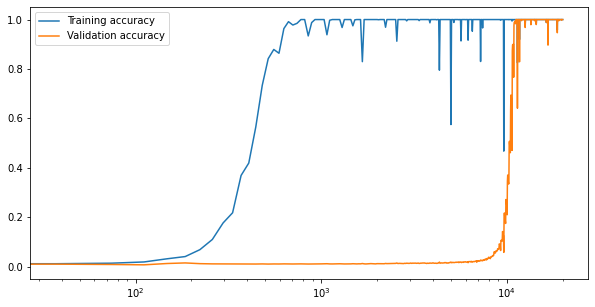

In [53]:
skip = 37
plt.figure(figsize=(10,5))
plt.xscale("log")
s = slice(None, None, skip)
nums = list(range((len(accs_val))))
plt.plot(nums[s], accs_tr[s], label="Training accuracy")
plt.plot(nums[s], accs_val[s], label="Validation accuracy")
plt.legend(loc="upper left")
plt.show()